# import library

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.inception_v3 import InceptionV3

# import data

In [2]:
base_dir = os.path.join("D:\DATASET_JAMBU\Taftyani")
print("Dataset --> ", os.listdir(base_dir))

Dataset -->  ['KELAS A', 'KELAS B', 'KELAS SUPER', 'luarmutu']


In [3]:
images = []
labels = []
IMG_SIZE = 299
KELAS_A = base_dir + '\KELAS A'
KELAS_B = base_dir + '\KELAS B'
KELAS_SUPER = base_dir + '\KELAS SUPER'
LUARMUTU = base_dir + '\luarmutu'

In [4]:
#fungsi untuk menetapkan label tiap data
def assign_label(img, Mutu_jambu):
    return Mutu_jambu

In [5]:
def make_data(Mutu_jambu, DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img, Mutu_jambu)
        path = os.path.join(DIR,img)
#         img = cv2.imread(path,cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        images.append(np.array(img))
        labels.append(str(label))

In [6]:
make_data('kelas_a', KELAS_A)
print(len(images))

make_data('kelas_b', KELAS_B)
print(len(images))

make_data('kelas_super', KELAS_SUPER)
print(len(images))

make_data('luarmutu', LUARMUTU)
print(len(images))

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 285.65it/s]


40


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 270.21it/s]


80


100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 297.80it/s]


122


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 20.49it/s]

166


# Preprocessing data

In [7]:
le = LabelEncoder()
Y = le.fit_transform(labels)
Y = to_categorical(Y,4)
X = np.array(images)
X = X/255

In [8]:
#split data menjadi train test dan validation data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(112, 299, 299, 3)
(20, 299, 299, 3)
(34, 299, 299, 3)


In [9]:
#augmentasi pada data training
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [10]:
#duplikat data sebanyak skenario yang akan dijalankan agar semua data sama
x_train1, x_val1, x_test1, y_train1, y_val1, y_test1 = x_train, x_val, x_test, y_train, y_val, y_test
x_train2, x_val2, x_test2, y_train2, y_val2, y_test2 = x_train, x_val, x_test, y_train, y_val, y_test
x_train3, x_val3, x_test3, y_train3, y_val3, y_test3 = x_train, x_val, x_test, y_train, y_val, y_test
x_train4, x_val4, x_test4, y_train4, y_val4, y_test4 = x_train, x_val, x_test, y_train, y_val, y_test
x_train5, x_val5, x_test5, y_train5, y_val5, y_test5 = x_train, x_val, x_test, y_train, y_val, y_test
x_train6, x_val6, x_test6, y_train6, y_val6, y_test6 = x_train, x_val, x_test, y_train, y_val, y_test
x_train7, x_val7, x_test7, y_train7, y_val7, y_test7 = x_train, x_val, x_test, y_train, y_val, y_test
x_train8, x_val8, x_test8, y_train8, y_val8, y_test8 = x_train, x_val, x_test, y_train, y_val, y_test
x_train9, x_val9, x_test9, y_train9, y_val9, y_test9 = x_train, x_val, x_test, y_train, y_val, y_test
x_train10, x_val10, x_test10, y_train10, y_val10, y_test10 = x_train, x_val, x_test, y_train, y_val, y_test
x_train11, x_val11, x_test11, y_train11, y_val11, y_test11 = x_train, x_val, x_test, y_train, y_val, y_test
x_train12, x_val12, x_test12, y_train12, y_val12, y_test12 = x_train, x_val, x_test, y_train, y_val, y_test
x_train13, x_val13, x_test13, y_train13, y_val13, y_test13 = x_train, x_val, x_test, y_train, y_val, y_test
x_train14, x_val14, x_test14, y_train14, y_val14, y_test14 = x_train, x_val, x_test, y_train, y_val, y_test
x_train15, x_val15, x_test15, y_train15, y_val15, y_test15 = x_train, x_val, x_test, y_train, y_val, y_test
x_train16, x_val16, x_test16, y_train16, y_val16, y_test16 = x_train, x_val, x_test, y_train, y_val, y_test
x_train17, x_val17, x_test17, y_train17, y_val17, y_test17 = x_train, x_val, x_test, y_train, y_val, y_test
x_train18, x_val18, x_test18, y_train18, y_val18, y_test18 = x_train, x_val, x_test, y_train, y_val, y_test


In [11]:
x_train19, x_val19, x_test19, y_train19, y_val19, y_test19 = x_train, x_val, x_test, y_train, y_val, y_test
x_train20, x_val20, x_test20, y_train20, y_val20, y_test20 = x_train, x_val, x_test, y_train, y_val, y_test
x_train21, x_val21, x_test21, y_train21, y_val21, y_test21 = x_train, x_val, x_test, y_train, y_val, y_test

# permodelan

In [12]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inceptionv3 = InceptionV3(input_shape=(299, 299, 3),
                                    include_top=False,
                                    weights=local_weights_file)
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [13]:
for layer in inceptionv3.layers:
    layer.trainable = False

last_layer = inceptionv3.layers[-1]
last_output = last_layer.output

In [14]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inceptionv3.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
# duplikat model sesuai skenario yang akan dijalankan
# dalam skenario awal ini dilakukan dengan melakukan tuning epochs dan Learning rate
# skenario untuk melihat pengaruh dropout layer dijlankan dalam skenario selanjutnya

model1=model #epochs 100 Lr 0.001(default)
model2=model #epochs 100 Lr 0.005
model3=model #epochs 100 Lr 0.0001
model4=model #epochs 100 Lr 0.0005
model5=model #epochs 100 Lr 0.00001
model6=model #epochs 100 Lr 0.00005

model7=model #epochs 200 Lr 0.001(default)
model8=model #epochs 200 Lr 0.005
model9=model #epochs 200 Lr 0.0001
model10=model #epochs 200 Lr 0.0005
model11=model #epochs 200 Lr 0.00001
model12=model #epochs 200 Lr 0.00005

# ---------Skenario ke 1 epochs 100 dan learning rate 0.001-0.00005 ----------------

# Model 1

# Training

In [16]:
model1.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history1=model1.fit(datagen.flow(x_train1, y_train1),
            validation_data=(x_val1, y_val1),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 34s 6s/step - loss: 20.5506 - accuracy: 0.2589 - val_loss: 14.9354 - val_accuracy: 0.3000
Epoch 2/100
4/4 [==============================] - 2s 480ms/step - loss: 11.4777 - accuracy: 0.4286 - val_loss: 6.7583 - val_accuracy: 0.4500
Epoch 3/100
4/4 [==============================] - 2s 420ms/step - loss: 5.1385 - accuracy: 0.6339 - val_loss: 4.8872 - val_accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 2s 470ms/step - loss: 3.9220 - accuracy: 0.7054 - val_loss: 3.5908 - val_accuracy: 0.6500
Epoch 5/100
4/4 [==============================] - 2s 476ms/step - loss: 2.2313 - accuracy: 0.7857 - val_loss: 5.7815 - val_accuracy: 0.4500
Epoch 6/100
4/4 [==============================] - 2s 488ms/step - loss: 2.5599 - accuracy: 0.6964 - val_loss: 2.1220 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 2s 482ms/step - loss: 2.1587 - accuracy: 0.7768 - val_loss: 1.3604 - val_accuracy: 0.8000
Epoch 8/100


Epoch 59/100
4/4 [==============================] - 2s 542ms/step - loss: 0.7099 - accuracy: 0.9107 - val_loss: 2.2397 - val_accuracy: 0.9000
Epoch 60/100
4/4 [==============================] - 2s 536ms/step - loss: 0.4417 - accuracy: 0.9286 - val_loss: 1.8077 - val_accuracy: 0.9000
Epoch 61/100
4/4 [==============================] - 2s 419ms/step - loss: 0.6005 - accuracy: 0.9643 - val_loss: 1.3393 - val_accuracy: 0.8500
Epoch 62/100
4/4 [==============================] - 2s 468ms/step - loss: 1.0542 - accuracy: 0.9375 - val_loss: 3.0876 - val_accuracy: 0.8000
Epoch 63/100
4/4 [==============================] - 2s 414ms/step - loss: 0.4222 - accuracy: 0.9554 - val_loss: 4.1620 - val_accuracy: 0.7500
Epoch 64/100
4/4 [==============================] - 2s 533ms/step - loss: 0.9730 - accuracy: 0.9107 - val_loss: 2.5357 - val_accuracy: 0.8500
Epoch 65/100
4/4 [==============================] - 2s 423ms/step - loss: 0.8773 - accuracy: 0.8661 - val_loss: 3.2747 - val_accuracy: 0.8000
Epoch 

# evaluasi, testing dan visualisasi

In [18]:
history1.history

{'loss': [20.55063819885254,
  11.477693557739258,
  5.138476371765137,
  3.922029972076416,
  2.2313148975372314,
  2.559927225112915,
  2.158698797225952,
  1.6083978414535522,
  2.8465840816497803,
  1.769193410873413,
  2.4919991493225098,
  2.786628246307373,
  2.2523252964019775,
  0.9401541948318481,
  2.1253392696380615,
  1.445612907409668,
  0.9507179856300354,
  1.3171864748001099,
  1.7366281747817993,
  0.6219605207443237,
  0.9650365114212036,
  1.0158073902130127,
  0.7008875608444214,
  1.130845308303833,
  1.625028371810913,
  0.8572884202003479,
  1.0841079950332642,
  0.725208580493927,
  0.5963793992996216,
  0.8201640248298645,
  0.6851433515548706,
  0.5535720586776733,
  0.2675676643848419,
  0.4851053059101105,
  0.2735409140586853,
  0.7741618752479553,
  0.3686555325984955,
  0.11575817316770554,
  0.5726970434188843,
  0.38913294672966003,
  0.7944329380989075,
  0.08502873033285141,
  0.5009080171585083,
  0.29464998841285706,
  0.42035654187202454,
  0.4439

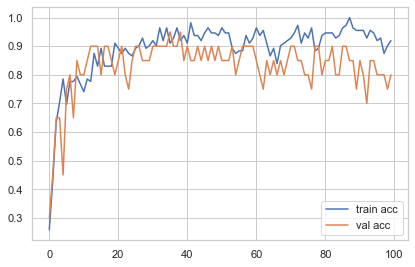

average acc = 0.8903571444749833
average val acc = 0.8305000013113022
max acc = 1.0
max val acc = 0.949999988079071


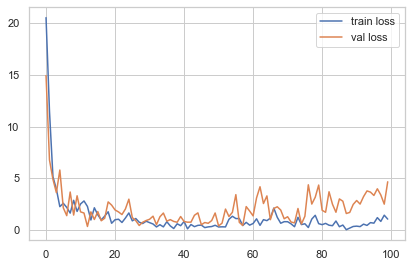

average loss = 1.2370847582485294
average val loss = 2.115494402348995
max loss = 20.55063819885254
max val loss = 14.93537712097168


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta1 = np.mean(history1.history['accuracy'])
print('average acc = {}'.format(ta1))
va1 = np.mean(history1.history['val_accuracy'])
print('average val acc = {}'.format(va1))
ta1a = np.max(history1.history['accuracy'])
print('max acc = {}'.format(ta1a))
va1a = np.max(history1.history['val_accuracy'])
print('max val acc = {}'.format(va1a))

# loss
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl1 = np.mean(history1.history['loss'])
print('average loss = {}'.format(tl1))
vl1 = np.mean(history1.history['val_loss'])
print('average val loss = {}'.format(vl1))
tl1a = np.max(history1.history['loss'])
print('max loss = {}'.format(tl1a))
vl1a = np.max(history1.history['val_loss'])
print('max val loss = {}'.format(vl1a))

In [20]:
score1 = model1.evaluate(x_val1, y_val1,  verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 4.643492698669434
Test accuracy: 0.800000011920929


In [21]:
Y_pred1 = model1.predict_generator(x_test1)
y_pred1 = np.argmax(Y_pred1, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

[[ 2  6  1  0]
 [ 1  8  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


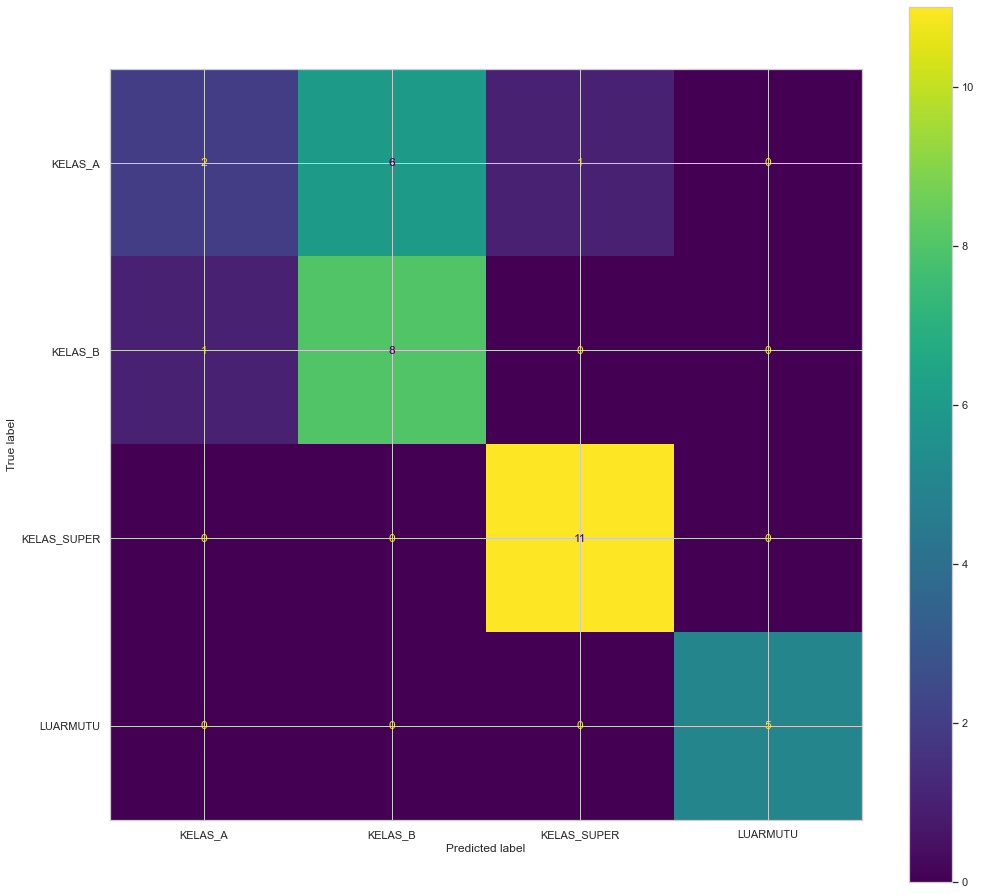

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.67      0.22      0.33         9
     KELAS_B       0.57      0.89      0.70         9
 KELAS_SUPER       0.92      1.00      0.96        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.76        34
   macro avg       0.79      0.78      0.75        34
weighted avg       0.77      0.76      0.73        34



# --------------------------------------------------------------------------------

# Model 2

# Training

In [16]:
model2.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history2=model2.fit(datagen.flow(x_train2, y_train2),
            validation_data=(x_val2, y_val2),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 29s 5s/step - loss: 83.9188 - accuracy: 0.3571 - val_loss: 29.0835 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 2s 550ms/step - loss: 59.4834 - accuracy: 0.4554 - val_loss: 13.7534 - val_accuracy: 0.6000
Epoch 3/100
4/4 [==============================] - 2s 561ms/step - loss: 42.8974 - accuracy: 0.4821 - val_loss: 34.0639 - val_accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 2s 483ms/step - loss: 27.1617 - accuracy: 0.5982 - val_loss: 29.0739 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 2s 473ms/step - loss: 21.5032 - accuracy: 0.7054 - val_loss: 56.2923 - val_accuracy: 0.4500
Epoch 6/100
4/4 [==============================] - 2s 557ms/step - loss: 17.2141 - accuracy: 0.6875 - val_loss: 27.5439 - val_accuracy: 0.7000
Epoch 7/100
4/4 [==============================] - 2s 549ms/step - loss: 15.6609 - accuracy: 0.7232 - val_loss: 14.7304 - val_accuracy: 0.7000
E

# evaluasi, testing dan visualisasi

In [18]:
history2.history

{'loss': [83.9188461303711,
  59.48343276977539,
  42.89742660522461,
  27.161651611328125,
  21.50321388244629,
  17.214115142822266,
  15.660928726196289,
  9.34359073638916,
  14.219818115234375,
  6.186641216278076,
  6.738734722137451,
  6.954154014587402,
  4.337852954864502,
  8.79018497467041,
  6.745009899139404,
  4.146417140960693,
  9.278730392456055,
  4.11904239654541,
  4.817604064941406,
  5.538337707519531,
  4.215703010559082,
  8.02885913848877,
  4.323353290557861,
  4.259371280670166,
  6.277340888977051,
  4.399800777435303,
  3.3811874389648438,
  4.669887542724609,
  5.02433443069458,
  4.509293556213379,
  7.5061492919921875,
  3.2188961505889893,
  2.946579694747925,
  1.6498892307281494,
  5.368927001953125,
  2.051771640777588,
  1.730318307876587,
  3.1197457313537598,
  1.2436790466308594,
  2.587972402572632,
  4.273463726043701,
  3.4314920902252197,
  1.197755217552185,
  3.1548221111297607,
  2.3674204349517822,
  1.8715627193450928,
  0.99472957849502

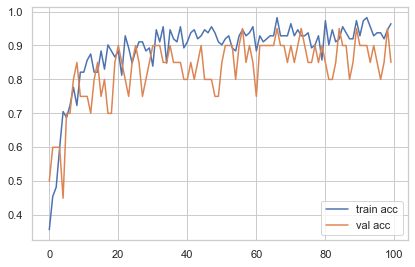

average acc = 0.8873214274644852
average val acc = 0.8315000009536743
max acc = 0.9821428656578064
max val acc = 0.949999988079071


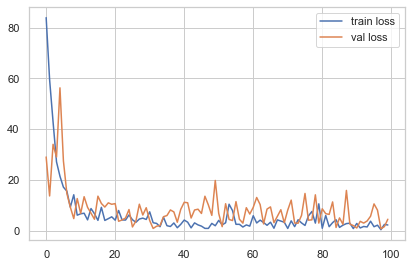

average loss = 6.2768562266230585
average val loss = 8.5724356174469
max loss = 83.9188461303711
max val loss = 56.29233932495117


In [20]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta2 = np.mean(history2.history['accuracy'])
print('average acc = {}'.format(ta2))
va2 = np.mean(history2.history['val_accuracy'])
print('average val acc = {}'.format(va2))
ta2a = np.max(history2.history['accuracy'])
print('max acc = {}'.format(ta2a))
va2a = np.max(history2.history['val_accuracy'])
print('max val acc = {}'.format(va2a))

# loss
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl2 = np.mean(history2.history['loss'])
print('average loss = {}'.format(tl2))
vl2 = np.mean(history2.history['val_loss'])
print('average val loss = {}'.format(vl2))
tl2a = np.max(history2.history['loss'])
print('max loss = {}'.format(tl2a))
vl2a = np.max(history2.history['val_loss'])
print('max val loss = {}'.format(vl2a))

In [21]:
score2 = model2.evaluate(x_val2, y_val2,  verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 4.593842506408691
Test accuracy: 0.8500000238418579


In [22]:
Y_pred2 = model2.predict_generator(x_test2)
y_pred2 = np.argmax(Y_pred2, axis=1)
y_test2 = np.argmax(y_test2, axis=1)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[ 4  3  2  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


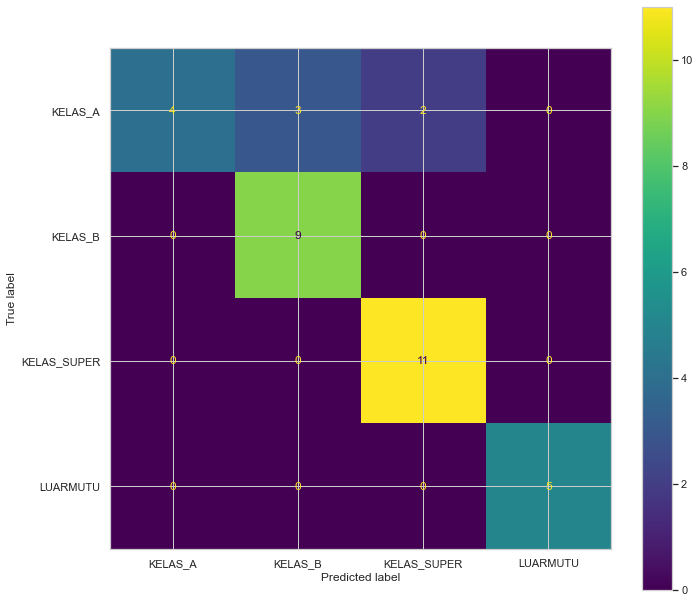

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.44      0.62         9
     KELAS_B       0.75      1.00      0.86         9
 KELAS_SUPER       0.85      1.00      0.92        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.85        34
   macro avg       0.90      0.86      0.85        34
weighted avg       0.88      0.85      0.83        34



# ------------------------------------------------------------------------------------------

# Model 3

In [16]:
model3.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history3=model3.fit(datagen.flow(x_train3, y_train3),
            validation_data=(x_val3, y_val3),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 29s 6s/step - loss: 2.6578 - accuracy: 0.4018 - val_loss: 1.2201 - val_accuracy: 0.4500
Epoch 2/100
4/4 [==============================] - 2s 432ms/step - loss: 1.6231 - accuracy: 0.3661 - val_loss: 0.6926 - val_accuracy: 0.7000
Epoch 3/100
4/4 [==============================] - 2s 551ms/step - loss: 0.8852 - accuracy: 0.6161 - val_loss: 1.1045 - val_accuracy: 0.5500
Epoch 4/100
4/4 [==============================] - 2s 483ms/step - loss: 0.8324 - accuracy: 0.6429 - val_loss: 0.7314 - val_accuracy: 0.6500
Epoch 5/100
4/4 [==============================] - 2s 477ms/step - loss: 0.5970 - accuracy: 0.7321 - val_loss: 0.6140 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 2s 477ms/step - loss: 0.5211 - accuracy: 0.7946 - val_loss: 0.4634 - val_accuracy: 0.8000
Epoch 7/100
4/4 [==============================] - 2s 554ms/step - loss: 0.4504 - accuracy: 0.8304 - val_loss: 0.4400 - val_accuracy: 0.8000
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 431ms/step - loss: 0.1141 - accuracy: 0.9643 - val_loss: 0.3902 - val_accuracy: 0.7500
Epoch 60/100
4/4 [==============================] - 2s 548ms/step - loss: 0.1037 - accuracy: 0.9643 - val_loss: 0.3818 - val_accuracy: 0.7500
Epoch 61/100
4/4 [==============================] - 2s 434ms/step - loss: 0.1438 - accuracy: 0.9554 - val_loss: 0.3502 - val_accuracy: 0.8000
Epoch 62/100
4/4 [==============================] - 2s 474ms/step - loss: 0.1250 - accuracy: 0.9464 - val_loss: 0.3638 - val_accuracy: 0.8000
Epoch 63/100
4/4 [==============================] - 2s 480ms/step - loss: 0.1328 - accuracy: 0.9554 - val_loss: 0.3244 - val_accuracy: 0.9000
Epoch 64/100
4/4 [==============================] - 2s 477ms/step - loss: 0.1158 - accuracy: 0.9643 - val_loss: 0.3308 - val_accuracy: 0.8500
Epoch 65/100
4/4 [==============================] - 2s 493ms/step - loss: 0.1108 - accuracy: 0.9554 - val_loss: 0.4427 - val_accuracy: 0.8500
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history3.history

{'loss': [2.6577506065368652,
  1.6231143474578857,
  0.8852078318595886,
  0.8323591351509094,
  0.5969980955123901,
  0.5210891366004944,
  0.45040422677993774,
  0.45835331082344055,
  0.3087143301963806,
  0.4005325734615326,
  0.2358579933643341,
  0.30551591515541077,
  0.31656232476234436,
  0.23873969912528992,
  0.24780809879302979,
  0.24984243512153625,
  0.192886084318161,
  0.25471827387809753,
  0.18170508742332458,
  0.22562824189662933,
  0.21846914291381836,
  0.2176470309495926,
  0.2434927076101303,
  0.22008070349693298,
  0.1709098070859909,
  0.2239687591791153,
  0.16428813338279724,
  0.16976714134216309,
  0.22106634080410004,
  0.23778872191905975,
  0.25084295868873596,
  0.15209606289863586,
  0.15365828573703766,
  0.15477435290813446,
  0.18851660192012787,
  0.25032222270965576,
  0.25770577788352966,
  0.15095821022987366,
  0.1408367156982422,
  0.17588575184345245,
  0.12597240507602692,
  0.1318100541830063,
  0.11719959229230881,
  0.1595381796360016

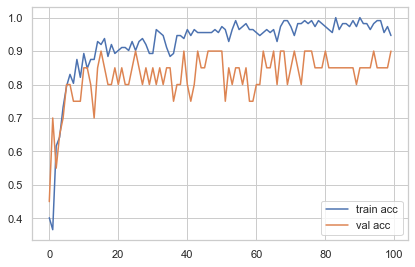

average acc = 0.924553570151329
average val acc = 0.8265000075101853
max acc = 1.0
max val acc = 0.8999999761581421


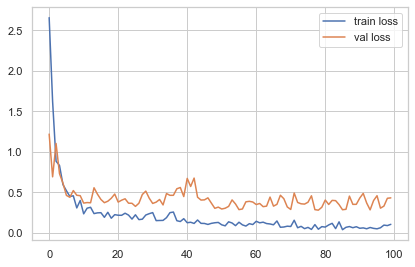

average loss = 0.20855161990970372
average val loss = 0.42388641625642776
max loss = 2.6577506065368652
max val loss = 1.2200944423675537


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta3 = np.mean(history3.history['accuracy'])
print('average acc = {}'.format(ta3))
va3 = np.mean(history3.history['val_accuracy'])
print('average val acc = {}'.format(va3))
ta3a = np.max(history3.history['accuracy'])
print('max acc = {}'.format(ta3a))
va3a = np.max(history3.history['val_accuracy'])
print('max val acc = {}'.format(va3a))


# loss
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl3 = np.mean(history3.history['loss'])
print('average loss = {}'.format(tl3))
vl3 = np.mean(history3.history['val_loss'])
print('average val loss = {}'.format(vl3))
tl3a = np.max(history3.history['loss'])
print('max loss = {}'.format(tl3a))
vl3a = np.max(history3.history['val_loss'])
print('max val loss = {}'.format(vl3a))

In [20]:
score3 = model3.evaluate(x_val3, y_val3,  verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.4328192174434662
Test accuracy: 0.8999999761581421


In [21]:
Y_pred3 = model3.predict_generator(x_test3)
y_pred3 = np.argmax(Y_pred3, axis=1)
y_test3 = np.argmax(y_test3, axis=1)
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

[[ 2  5  2  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


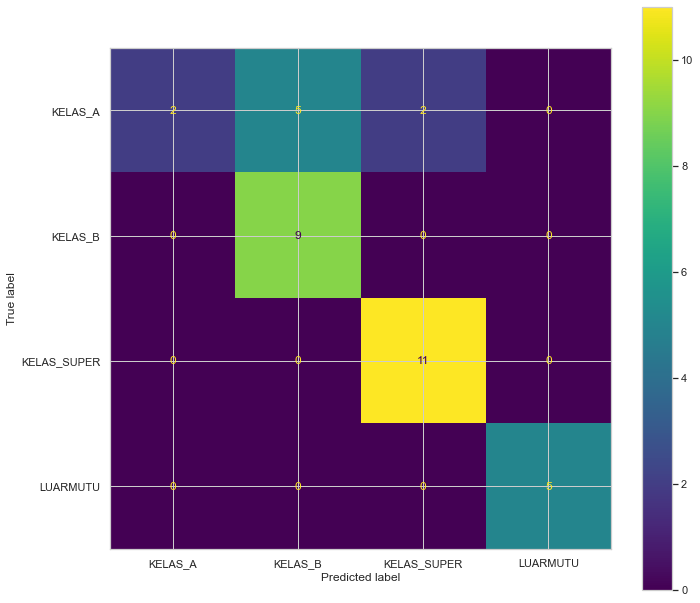

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test3, y_pred3, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test3, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.22      0.36         9
     KELAS_B       0.64      1.00      0.78         9
 KELAS_SUPER       0.85      1.00      0.92        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.79        34
   macro avg       0.87      0.81      0.77        34
weighted avg       0.86      0.79      0.75        34



# --------------------------------------------------------------------------

# Model 4

In [16]:
model4.compile(optimizer=Adam(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history4 = model4.fit(datagen.flow(x_train4, y_train4),
            validation_data=(x_val4, y_val4),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 29s 5s/step - loss: 7.2644 - accuracy: 0.3839 - val_loss: 3.9980 - val_accuracy: 0.4500
Epoch 2/100
4/4 [==============================] - 2s 472ms/step - loss: 2.9401 - accuracy: 0.5893 - val_loss: 0.7759 - val_accuracy: 0.8000
Epoch 3/100
4/4 [==============================] - 2s 473ms/step - loss: 2.2218 - accuracy: 0.6518 - val_loss: 0.8866 - val_accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 2s 480ms/step - loss: 2.1578 - accuracy: 0.6607 - val_loss: 1.9209 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 2s 542ms/step - loss: 1.2416 - accuracy: 0.7768 - val_loss: 1.5351 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 2s 556ms/step - loss: 0.9340 - accuracy: 0.8393 - val_loss: 1.0508 - val_accuracy: 0.7000
Epoch 7/100
4/4 [==============================] - 2s 425ms/step - loss: 0.7835 - accuracy: 0.8214 - val_loss: 1.2521 - val_accuracy: 0.8500
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 429ms/step - loss: 0.1949 - accuracy: 0.9643 - val_loss: 0.5888 - val_accuracy: 0.9500
Epoch 60/100
4/4 [==============================] - 2s 546ms/step - loss: 0.2907 - accuracy: 0.9196 - val_loss: 1.5018 - val_accuracy: 0.8500
Epoch 61/100
4/4 [==============================] - 2s 489ms/step - loss: 0.2447 - accuracy: 0.9464 - val_loss: 1.4562 - val_accuracy: 0.8000
Epoch 62/100
4/4 [==============================] - 2s 481ms/step - loss: 0.3470 - accuracy: 0.9196 - val_loss: 0.4057 - val_accuracy: 0.9000
Epoch 63/100
4/4 [==============================] - 2s 422ms/step - loss: 0.0503 - accuracy: 0.9643 - val_loss: 0.3504 - val_accuracy: 0.9000
Epoch 64/100
4/4 [==============================] - 2s 430ms/step - loss: 0.2426 - accuracy: 0.9464 - val_loss: 1.3962 - val_accuracy: 0.9000
Epoch 65/100
4/4 [==============================] - 2s 430ms/step - loss: 0.4057 - accuracy: 0.9018 - val_loss: 0.8443 - val_accuracy: 0.9000
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history4.history

{'loss': [7.264400959014893,
  2.940058946609497,
  2.221799373626709,
  2.1578032970428467,
  1.2415704727172852,
  0.9339627027511597,
  0.7835124135017395,
  1.2803738117218018,
  0.8362693786621094,
  0.7315179109573364,
  0.8136090040206909,
  0.4808526337146759,
  0.42960458993911743,
  0.672447681427002,
  0.9256102442741394,
  0.44207048416137695,
  0.5763035416603088,
  0.7260298728942871,
  0.5899375677108765,
  0.49472931027412415,
  0.6702194213867188,
  0.5986122488975525,
  0.5843172669410706,
  0.39371269941329956,
  0.6073674559593201,
  0.343779057264328,
  0.4518747925758362,
  0.21787773072719574,
  0.35949018597602844,
  0.3049062192440033,
  0.6883540153503418,
  0.4491727650165558,
  0.5864958763122559,
  0.5208898186683655,
  0.37212905287742615,
  0.6319037675857544,
  0.6911298036575317,
  0.14560392498970032,
  0.5161843299865723,
  0.25586432218551636,
  0.2654096186161041,
  0.28822383284568787,
  0.14990882575511932,
  0.25465768575668335,
  0.2950578033924

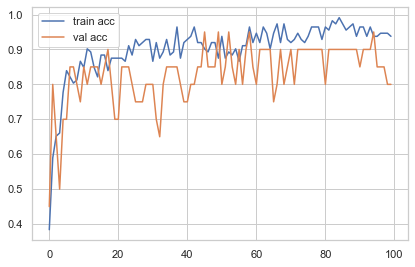

average acc = 0.9013392874598503
average val acc = 0.8320000004768372
max acc = 0.9910714030265808
max val acc = 0.949999988079071


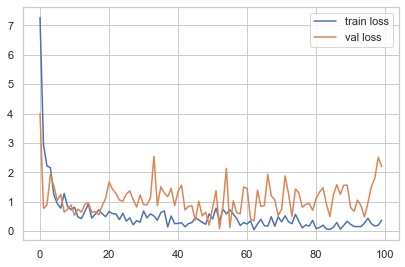

average loss = 0.5422923480346798
average val loss = 1.0943937133252621
max loss = 7.264400959014893
max val loss = 3.9979896545410156


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history4.history['accuracy'], label='train acc')
plt.plot(history4.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta4 = np.mean(history4.history['accuracy'])
print('average acc = {}'.format(ta4))
va4 = np.mean(history4.history['val_accuracy'])
print('average val acc = {}'.format(va4))
ta4a = np.max(history4.history['accuracy'])
print('max acc = {}'.format(ta4a))
va4a = np.max(history4.history['val_accuracy'])
print('max val acc = {}'.format(va4a))

# loss
plt.plot(history4.history['loss'], label='train loss')
plt.plot(history4.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl4 = np.mean(history4.history['loss'])
print('average loss = {}'.format(tl4))
vl4 = np.mean(history4.history['val_loss'])
print('average val loss = {}'.format(vl4))
tl4a = np.max(history4.history['loss'])
print('max loss = {}'.format(tl4a))
vl4a = np.max(history4.history['val_loss'])
print('max val loss = {}'.format(vl4a))

In [20]:
score4 = model4.evaluate(x_val4, y_val4,  verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 2.1937153339385986
Test accuracy: 0.800000011920929


In [21]:
Y_pred4 = model4.predict_generator(x_test4)
y_pred4 = np.argmax(Y_pred4, axis=1)
y_test4 = np.argmax(y_test4, axis=1)
cm4 = confusion_matrix(y_test4, y_pred4)
print(cm4)


[[ 5  1  3  0]
 [ 0  8  0  1]
 [ 0  0 11  0]
 [ 0  0  0  5]]


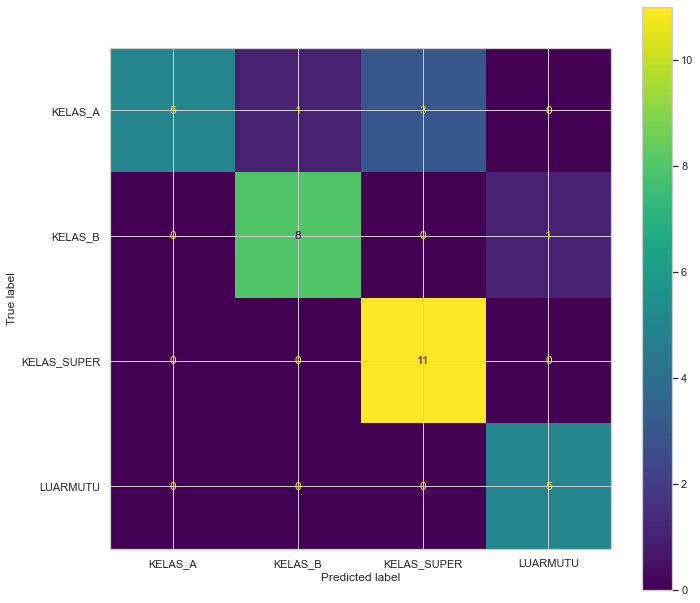

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test4, y_pred4, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test4, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.56      0.71         9
     KELAS_B       0.89      0.89      0.89         9
 KELAS_SUPER       0.79      1.00      0.88        11
    LUARMUTU       0.83      1.00      0.91         5

    accuracy                           0.85        34
   macro avg       0.88      0.86      0.85        34
weighted avg       0.88      0.85      0.84        34



# -------------------------------------------------------------------------------------

# Model 5

In [16]:
model5.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history5 =model5.fit(datagen.flow(x_train5,y_train5),
            validation_data=(x_val5, y_val5),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 29s 5s/step - loss: 1.3476 - accuracy: 0.3929 - val_loss: 1.5503 - val_accuracy: 0.3000
Epoch 2/100
4/4 [==============================] - 2s 409ms/step - loss: 1.2106 - accuracy: 0.4643 - val_loss: 1.4262 - val_accuracy: 0.4000
Epoch 3/100
4/4 [==============================] - 2s 468ms/step - loss: 1.1102 - accuracy: 0.5089 - val_loss: 1.2984 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 2s 466ms/step - loss: 1.0059 - accuracy: 0.5804 - val_loss: 1.2009 - val_accuracy: 0.5500
Epoch 5/100
4/4 [==============================] - 2s 462ms/step - loss: 0.8966 - accuracy: 0.6071 - val_loss: 1.1434 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 2s 528ms/step - loss: 0.8343 - accuracy: 0.6786 - val_loss: 1.0890 - val_accuracy: 0.4500
Epoch 7/100
4/4 [==============================] - 2s 407ms/step - loss: 0.7669 - accuracy: 0.7321 - val_loss: 1.0541 - val_accuracy: 0.5000
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 411ms/step - loss: 0.2885 - accuracy: 0.8750 - val_loss: 0.4785 - val_accuracy: 0.8000
Epoch 60/100
4/4 [==============================] - 2s 538ms/step - loss: 0.3041 - accuracy: 0.8839 - val_loss: 0.4622 - val_accuracy: 0.8000
Epoch 61/100
4/4 [==============================] - 2s 417ms/step - loss: 0.2655 - accuracy: 0.9196 - val_loss: 0.4660 - val_accuracy: 0.8000
Epoch 62/100
4/4 [==============================] - 2s 420ms/step - loss: 0.2869 - accuracy: 0.9018 - val_loss: 0.4794 - val_accuracy: 0.8000
Epoch 63/100
4/4 [==============================] - 2s 531ms/step - loss: 0.3325 - accuracy: 0.8839 - val_loss: 0.5043 - val_accuracy: 0.8000
Epoch 64/100
4/4 [==============================] - 2s 542ms/step - loss: 0.3084 - accuracy: 0.9018 - val_loss: 0.4819 - val_accuracy: 0.8000
Epoch 65/100
4/4 [==============================] - 2s 470ms/step - loss: 0.2908 - accuracy: 0.9018 - val_loss: 0.4594 - val_accuracy: 0.8000
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history5.history

{'loss': [1.3476202487945557,
  1.2105658054351807,
  1.1102007627487183,
  1.0059489011764526,
  0.8966353535652161,
  0.8343240022659302,
  0.7668589949607849,
  0.7755911946296692,
  0.6736410856246948,
  0.7302416563034058,
  0.6786800026893616,
  0.6813388466835022,
  0.5973142981529236,
  0.609175980091095,
  0.5613139271736145,
  0.5945307612419128,
  0.5592429041862488,
  0.5234092473983765,
  0.4868294298648834,
  0.5082992315292358,
  0.49319902062416077,
  0.4824313521385193,
  0.532017171382904,
  0.46996375918388367,
  0.47060900926589966,
  0.42087432742118835,
  0.42653581500053406,
  0.44038912653923035,
  0.3989356458187103,
  0.3781488537788391,
  0.43482738733291626,
  0.4389522075653076,
  0.4321572482585907,
  0.433186799287796,
  0.40096786618232727,
  0.408983439207077,
  0.3785848617553711,
  0.3658866286277771,
  0.36980605125427246,
  0.3537333905696869,
  0.3235153257846832,
  0.35275933146476746,
  0.3817567229270935,
  0.309560626745224,
  0.322427123785018

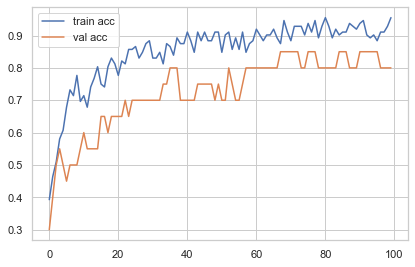

average acc = 0.8510714271664619
average val acc = 0.7270000049471855
max acc = 0.9553571343421936
max val acc = 0.8500000238418579


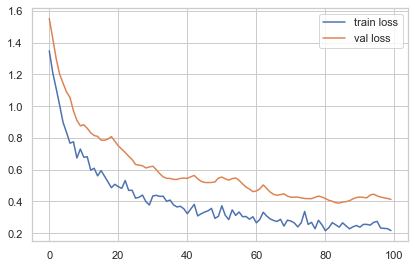

average loss = 0.406004540771246
average val loss = 0.5967984417080879
max loss = 1.3476202487945557
max val loss = 1.5502792596817017


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history5.history['accuracy'], label='train acc')
plt.plot(history5.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta5 = np.mean(history5.history['accuracy'])
print('average acc = {}'.format(ta5))
va5 = np.mean(history5.history['val_accuracy'])
print('average val acc = {}'.format(va5))
ta5a = np.max(history5.history['accuracy'])
print('max acc = {}'.format(ta5a))
va5a = np.max(history5.history['val_accuracy'])
print('max val acc = {}'.format(va5a))

# loss
plt.plot(history5.history['loss'], label='train loss')
plt.plot(history5.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl5 = np.mean(history5.history['loss'])
print('average loss = {}'.format(tl5))
vl5 = np.mean(history5.history['val_loss'])
print('average val loss = {}'.format(vl5))
tl5a = np.max(history5.history['loss'])
print('max loss = {}'.format(tl5a))
vl5a = np.max(history5.history['val_loss'])
print('max val loss = {}'.format(vl5a))

In [20]:
score5 = model5.evaluate(x_val5, y_val5,  verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.4134691655635834
Test accuracy: 0.800000011920929


In [21]:
Y_pred5 = model5.predict_generator(x_test5)
y_pred5 = np.argmax(Y_pred5, axis=1)
y_test5 = np.argmax(y_test5, axis=1)
cm5 = confusion_matrix(y_test5, y_pred5)
print(cm5)

[[5 2 2 0]
 [1 8 0 0]
 [2 0 9 0]
 [0 0 0 5]]


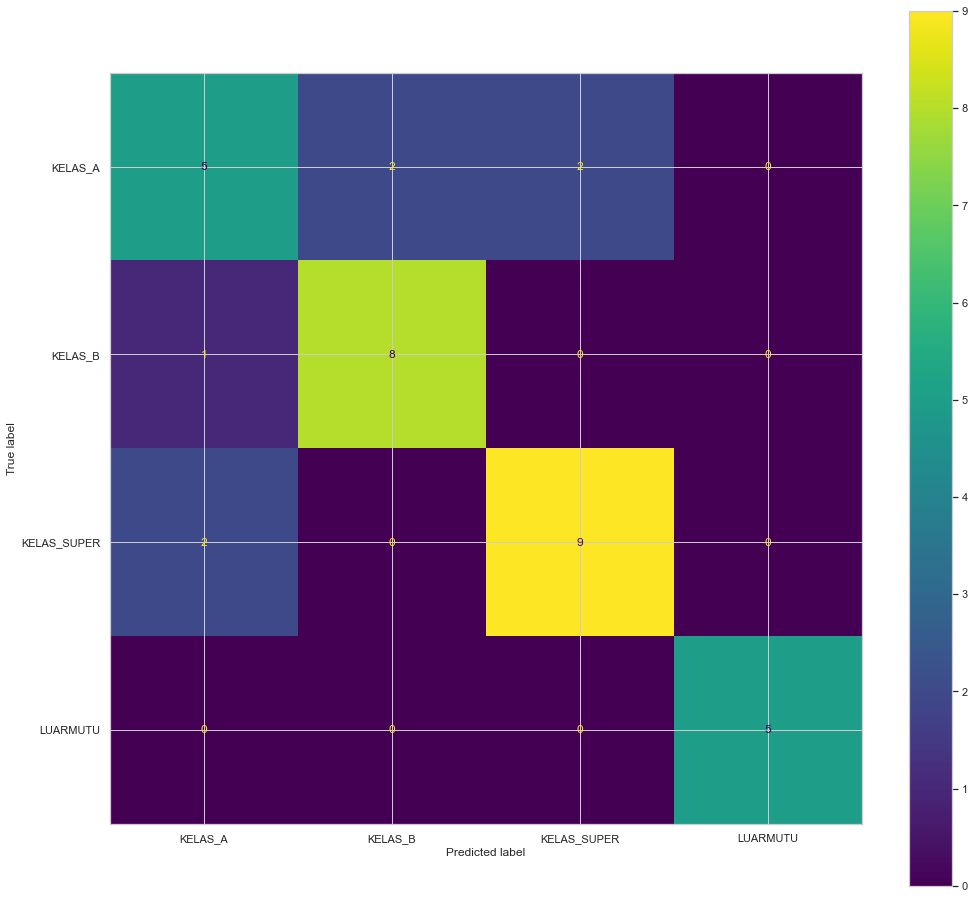

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test5, y_pred5, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test5, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.62      0.56      0.59         9
     KELAS_B       0.80      0.89      0.84         9
 KELAS_SUPER       0.82      0.82      0.82        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.79        34
   macro avg       0.81      0.82      0.81        34
weighted avg       0.79      0.79      0.79        34



# ------------------------------------------------------------------------

# Model 6

In [16]:
model6.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history6 =model6.fit(datagen.flow(x_train6,y_train6),
            validation_data=(x_val6, y_val6),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 29s 5s/step - loss: 1.5877 - accuracy: 0.3839 - val_loss: 1.3132 - val_accuracy: 0.6000
Epoch 2/100
4/4 [==============================] - 2s 414ms/step - loss: 1.0245 - accuracy: 0.5268 - val_loss: 0.9587 - val_accuracy: 0.6000
Epoch 3/100
4/4 [==============================] - 2s 419ms/step - loss: 0.7352 - accuracy: 0.6607 - val_loss: 0.9761 - val_accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 2s 457ms/step - loss: 0.6049 - accuracy: 0.7232 - val_loss: 0.9413 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 2s 530ms/step - loss: 0.5889 - accuracy: 0.7321 - val_loss: 0.7012 - val_accuracy: 0.8000
Epoch 6/100
4/4 [==============================] - 2s 475ms/step - loss: 0.5556 - accuracy: 0.7679 - val_loss: 0.5912 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 2s 406ms/step - loss: 0.4585 - accuracy: 0.8125 - val_loss: 0.5639 - val_accuracy: 0.8000
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 465ms/step - loss: 0.1613 - accuracy: 0.9196 - val_loss: 0.3269 - val_accuracy: 0.7500
Epoch 60/100
4/4 [==============================] - 2s 524ms/step - loss: 0.1340 - accuracy: 0.9464 - val_loss: 0.3789 - val_accuracy: 0.8500
Epoch 61/100
4/4 [==============================] - 2s 479ms/step - loss: 0.1606 - accuracy: 0.9643 - val_loss: 0.4189 - val_accuracy: 0.8500
Epoch 62/100
4/4 [==============================] - 2s 467ms/step - loss: 0.1213 - accuracy: 0.9375 - val_loss: 0.3300 - val_accuracy: 0.8500
Epoch 63/100
4/4 [==============================] - 2s 457ms/step - loss: 0.1520 - accuracy: 0.9375 - val_loss: 0.3106 - val_accuracy: 0.8500
Epoch 64/100
4/4 [==============================] - 2s 466ms/step - loss: 0.1123 - accuracy: 0.9821 - val_loss: 0.3897 - val_accuracy: 0.8500
Epoch 65/100
4/4 [==============================] - 2s 536ms/step - loss: 0.1186 - accuracy: 0.9643 - val_loss: 0.3833 - val_accuracy: 0.8500
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history6.history

{'loss': [1.5877279043197632,
  1.024504542350769,
  0.7351565957069397,
  0.6049111485481262,
  0.5889038443565369,
  0.5555515289306641,
  0.4585437774658203,
  0.48701316118240356,
  0.3960703909397125,
  0.4217076897621155,
  0.3576653003692627,
  0.3315834105014801,
  0.32293885946273804,
  0.2621576488018036,
  0.33658337593078613,
  0.266446590423584,
  0.2847297191619873,
  0.28945013880729675,
  0.26216092705726624,
  0.23612329363822937,
  0.19648535549640656,
  0.2674174904823303,
  0.2902502417564392,
  0.26969775557518005,
  0.2302999496459961,
  0.23281803727149963,
  0.25391867756843567,
  0.22239959239959717,
  0.23100556433200836,
  0.2406635284423828,
  0.16248564422130585,
  0.15662050247192383,
  0.16460801661014557,
  0.16439981758594513,
  0.1833437830209732,
  0.29422321915626526,
  0.19859662652015686,
  0.17814941704273224,
  0.21796979010105133,
  0.19226662814617157,
  0.16336525976657867,
  0.12412495166063309,
  0.16375480592250824,
  0.13862857222557068,
 

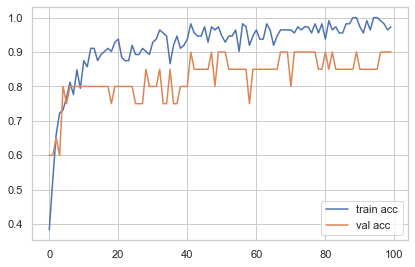

average acc = 0.9206250008940696
average val acc = 0.8280000072717667
max acc = 1.0
max val acc = 0.8999999761581421


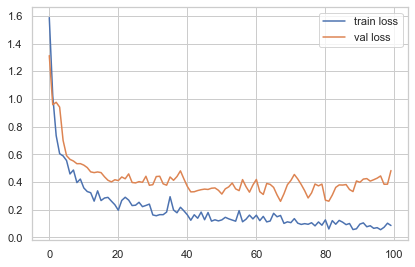

average loss = 0.21139471761882306
average val loss = 0.42498599022626876
max loss = 1.5877279043197632
max val loss = 1.313240885734558


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history6.history['accuracy'], label='train acc')
plt.plot(history6.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta6 = np.mean(history6.history['accuracy'])
print('average acc = {}'.format(ta6))
va6 = np.mean(history6.history['val_accuracy'])
print('average val acc = {}'.format(va6))
ta6a = np.max(history6.history['accuracy'])
print('max acc = {}'.format(ta6a))
va6a = np.max(history6.history['val_accuracy'])
print('max val acc = {}'.format(va6a))

# loss
plt.plot(history6.history['loss'], label='train loss')
plt.plot(history6.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl6 = np.mean(history6.history['loss'])
print('average loss = {}'.format(tl6))
vl6 = np.mean(history6.history['val_loss'])
print('average val loss = {}'.format(vl6))
tl6a = np.max(history6.history['loss'])
print('max loss = {}'.format(tl6a))
vl6a = np.max(history6.history['val_loss'])
print('max val loss = {}'.format(vl6a))

In [20]:
score6 = model6.evaluate(x_val6, y_val6,  verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Test loss: 0.48316535353660583
Test accuracy: 0.8999999761581421


In [21]:
Y_pred6 = model6.predict_generator(x_test6)
y_pred6 = np.argmax(Y_pred6, axis=1)
y_test6 = np.argmax(y_test6, axis=1)
cm6 = confusion_matrix(y_test6, y_pred6)
print(cm6)

[[ 4  2  3  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


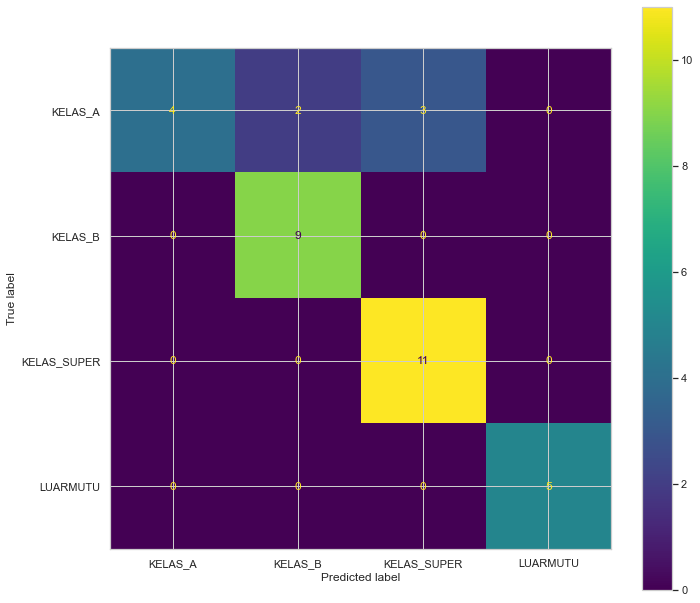

In [22]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test6, y_pred6, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test6, y_pred6, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.44      0.62         9
     KELAS_B       0.82      1.00      0.90         9
 KELAS_SUPER       0.79      1.00      0.88        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.85        34
   macro avg       0.90      0.86      0.85        34
weighted avg       0.88      0.85      0.83        34



# ---------------------------------------------------------------------------------------------------------------

# ---------- Skenario ke 1 epochs 200 dan learning rate 0.001-0.00005 -----------

# Model 7

# Training

In [16]:
model7.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history7 = model7.fit(datagen.flow(x_train7, y_train7),
            validation_data=(x_val7, y_val7),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 29s 5s/step - loss: 24.3239 - accuracy: 0.2679 - val_loss: 15.7320 - val_accuracy: 0.4000
Epoch 2/200
4/4 [==============================] - 2s 470ms/step - loss: 15.2841 - accuracy: 0.4107 - val_loss: 19.1776 - val_accuracy: 0.3500
Epoch 3/200
4/4 [==============================] - 2s 468ms/step - loss: 12.4031 - accuracy: 0.5625 - val_loss: 5.3287 - val_accuracy: 0.6000
Epoch 4/200
4/4 [==============================] - 2s 481ms/step - loss: 4.6172 - accuracy: 0.7054 - val_loss: 5.4251 - val_accuracy: 0.7000
Epoch 5/200
4/4 [==============================] - 2s 429ms/step - loss: 2.9430 - accuracy: 0.7232 - val_loss: 3.8157 - val_accuracy: 0.5500
Epoch 6/200
4/4 [==============================] - 2s 480ms/step - loss: 3.1379 - accuracy: 0.7143 - val_loss: 4.3081 - val_accuracy: 0.7500
Epoch 7/200
4/4 [==============================] - 2s 471ms/step - loss: 2.4882 - accuracy: 0.7500 - val_loss: 2.3686 - val_accuracy: 0.7000
Epoch 8/20

Epoch 59/200
4/4 [==============================] - 2s 478ms/step - loss: 0.2798 - accuracy: 0.9464 - val_loss: 1.3534 - val_accuracy: 0.8500
Epoch 60/200
4/4 [==============================] - 2s 483ms/step - loss: 0.7999 - accuracy: 0.9375 - val_loss: 1.0082 - val_accuracy: 0.8000
Epoch 61/200
4/4 [==============================] - 2s 483ms/step - loss: 0.7803 - accuracy: 0.8929 - val_loss: 2.3281 - val_accuracy: 0.8500
Epoch 62/200
4/4 [==============================] - 2s 542ms/step - loss: 0.4091 - accuracy: 0.9554 - val_loss: 1.2475 - val_accuracy: 0.8500
Epoch 63/200
4/4 [==============================] - 2s 481ms/step - loss: 0.9906 - accuracy: 0.8929 - val_loss: 2.0106 - val_accuracy: 0.8500
Epoch 64/200
4/4 [==============================] - 2s 521ms/step - loss: 0.8449 - accuracy: 0.9018 - val_loss: 1.6055 - val_accuracy: 0.9000
Epoch 65/200
4/4 [==============================] - 2s 550ms/step - loss: 0.3857 - accuracy: 0.9464 - val_loss: 1.7044 - val_accuracy: 0.8500
Epoch 

4/4 [==============================] - 2s 478ms/step - loss: 0.2956 - accuracy: 0.9732 - val_loss: 1.4720 - val_accuracy: 0.9500
Epoch 174/200
4/4 [==============================] - 2s 477ms/step - loss: 0.2680 - accuracy: 0.9732 - val_loss: 0.6572 - val_accuracy: 0.9500
Epoch 175/200
4/4 [==============================] - 2s 433ms/step - loss: 0.7953 - accuracy: 0.9554 - val_loss: 1.3397 - val_accuracy: 0.9000
Epoch 176/200
4/4 [==============================] - 2s 478ms/step - loss: 0.2621 - accuracy: 0.9643 - val_loss: 3.0207 - val_accuracy: 0.9000
Epoch 177/200
4/4 [==============================] - 2s 427ms/step - loss: 0.2116 - accuracy: 0.9732 - val_loss: 2.5746 - val_accuracy: 0.8500
Epoch 178/200
4/4 [==============================] - 2s 418ms/step - loss: 0.4345 - accuracy: 0.9554 - val_loss: 2.6523 - val_accuracy: 0.8000
Epoch 179/200
4/4 [==============================] - 2s 428ms/step - loss: 0.1943 - accuracy: 0.9821 - val_loss: 3.6310 - val_accuracy: 0.8000
Epoch 180/200

# evaluasi, testing dan visualisasi

In [18]:
history7.history

{'loss': [24.3238582611084,
  15.284086227416992,
  12.40310001373291,
  4.617217540740967,
  2.942950963973999,
  3.1378719806671143,
  2.4881834983825684,
  2.35105562210083,
  1.3238376379013062,
  1.188231110572815,
  1.7367517948150635,
  0.6815887093544006,
  1.6307704448699951,
  1.186874508857727,
  1.2734547853469849,
  0.6440725922584534,
  1.2131497859954834,
  1.3656460046768188,
  0.9673863053321838,
  1.1597672700881958,
  2.251774311065674,
  1.3904602527618408,
  1.706579327583313,
  1.6608668565750122,
  1.9765453338623047,
  1.2890254259109497,
  1.3537070751190186,
  1.957642674446106,
  1.8239480257034302,
  0.8858715891838074,
  3.390336275100708,
  2.4900593757629395,
  1.3979839086532593,
  2.5855712890625,
  1.9256842136383057,
  0.9189155697822571,
  0.7921090722084045,
  0.9940505027770996,
  0.5802921652793884,
  1.1523497104644775,
  0.1479770392179489,
  1.1365262269973755,
  0.4826304614543915,
  0.6688245534896851,
  0.3404986560344696,
  0.87704932689666

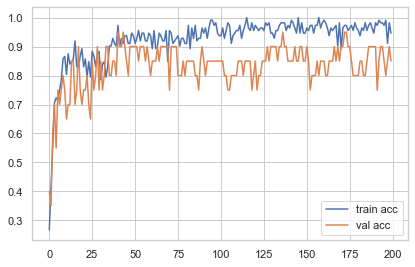

average acc = 0.9236607132852077
average val acc = 0.8325000035762787
max acc = 1.0
max val acc = 0.949999988079071


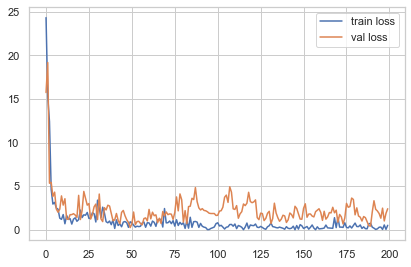

average loss = 0.9388479456154164
average val loss = 2.2241204941272734
max loss = 24.3238582611084
max val loss = 19.17758560180664


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history7.history['accuracy'], label='train acc')
plt.plot(history7.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta7 = np.mean(history7.history['accuracy'])
print('average acc = {}'.format(ta7))
va7 = np.mean(history7.history['val_accuracy'])
print('average val acc = {}'.format(va7))
ta7a = np.max(history7.history['accuracy'])
print('max acc = {}'.format(ta7a))
va7a = np.max(history7.history['val_accuracy'])
print('max val acc = {}'.format(va7a))

# loss
plt.plot(history7.history['loss'], label='train loss')
plt.plot(history7.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl7 = np.mean(history7.history['loss'])
print('average loss = {}'.format(tl7))
vl7 = np.mean(history7.history['val_loss'])
print('average val loss = {}'.format(vl7))
tl7a = np.max(history7.history['loss'])
print('max loss = {}'.format(tl7a))
vl7a = np.max(history7.history['val_loss'])
print('max val loss = {}'.format(vl7a))

In [20]:
score7 = model7.evaluate(x_val7, y_val7,  verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Test loss: 2.405853748321533
Test accuracy: 0.8500000238418579


In [21]:
Y_pred7 = model7.predict_generator(x_test7)
y_pred7 = np.argmax(Y_pred7, axis=1)
y_test7 = np.argmax(y_test7, axis=1)
cm7 = confusion_matrix(y_test7, y_pred7)
print(cm7)

[[ 3  6  0  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


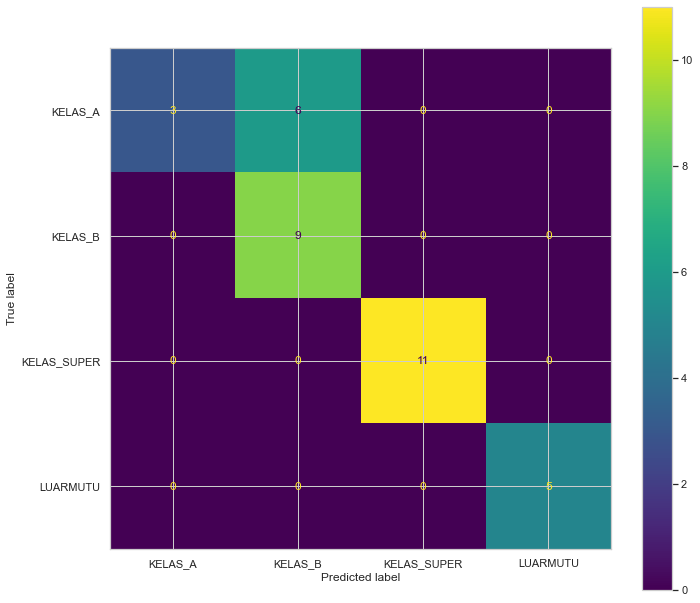

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test7, y_pred7, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test7, y_pred7, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.33      0.50         9
     KELAS_B       0.60      1.00      0.75         9
 KELAS_SUPER       1.00      1.00      1.00        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.82        34
   macro avg       0.90      0.83      0.81        34
weighted avg       0.89      0.82      0.80        34



# -----------------------------------------

# Model 8

# Training

In [16]:
model8.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history8 =model8.fit(datagen.flow(x_train8, y_train8),
            validation_data=(x_val8, y_val8),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 29s 5s/step - loss: 62.0898 - accuracy: 0.3393 - val_loss: 58.7545 - val_accuracy: 0.3500
Epoch 2/200
4/4 [==============================] - 2s 518ms/step - loss: 33.3814 - accuracy: 0.5446 - val_loss: 29.4446 - val_accuracy: 0.4500
Epoch 3/200
4/4 [==============================] - 2s 468ms/step - loss: 22.6429 - accuracy: 0.5982 - val_loss: 28.8265 - val_accuracy: 0.4500
Epoch 4/200
4/4 [==============================] - 2s 516ms/step - loss: 12.8206 - accuracy: 0.7054 - val_loss: 15.7376 - val_accuracy: 0.6500
Epoch 5/200
4/4 [==============================] - 2s 528ms/step - loss: 12.2827 - accuracy: 0.7321 - val_loss: 10.1065 - val_accuracy: 0.7000
Epoch 6/200
4/4 [==============================] - 2s 416ms/step - loss: 8.8104 - accuracy: 0.7679 - val_loss: 10.3628 - val_accuracy: 0.7500
Epoch 7/200
4/4 [==============================] - 2s 465ms/step - loss: 10.2126 - accuracy: 0.8036 - val_loss: 9.5610 - val_accuracy: 0.8000
Epo

4/4 [==============================] - 2s 541ms/step - loss: 2.5903e-05 - accuracy: 1.0000 - val_loss: 11.0081 - val_accuracy: 0.8500
Epoch 116/200
4/4 [==============================] - 2s 467ms/step - loss: 0.9420 - accuracy: 0.9821 - val_loss: 13.8895 - val_accuracy: 0.8500
Epoch 117/200
4/4 [==============================] - 2s 463ms/step - loss: 0.0096 - accuracy: 0.9911 - val_loss: 20.1883 - val_accuracy: 0.8000
Epoch 118/200
4/4 [==============================] - 2s 422ms/step - loss: 1.8270 - accuracy: 0.9554 - val_loss: 11.0841 - val_accuracy: 0.8000
Epoch 119/200
4/4 [==============================] - 2s 526ms/step - loss: 0.9412 - accuracy: 0.9821 - val_loss: 10.5314 - val_accuracy: 0.8500
Epoch 120/200
4/4 [==============================] - 2s 544ms/step - loss: 1.0395 - accuracy: 0.9643 - val_loss: 8.2720 - val_accuracy: 0.8000
Epoch 121/200
4/4 [==============================] - 2s 544ms/step - loss: 0.5010 - accuracy: 0.9911 - val_loss: 10.0379 - val_accuracy: 0.7500
Epo

4/4 [==============================] - 2s 421ms/step - loss: 0.5652 - accuracy: 0.9821 - val_loss: 16.8683 - val_accuracy: 0.9000
Epoch 173/200
4/4 [==============================] - 2s 469ms/step - loss: 3.1861 - accuracy: 0.9554 - val_loss: 17.7700 - val_accuracy: 0.9000
Epoch 174/200
4/4 [==============================] - 2s 470ms/step - loss: 1.8182 - accuracy: 0.9643 - val_loss: 13.0471 - val_accuracy: 0.8500
Epoch 175/200
4/4 [==============================] - 2s 425ms/step - loss: 1.5851 - accuracy: 0.9643 - val_loss: 23.4075 - val_accuracy: 0.8000
Epoch 176/200
4/4 [==============================] - 2s 468ms/step - loss: 1.0642 - accuracy: 0.9821 - val_loss: 20.1585 - val_accuracy: 0.8500
Epoch 177/200
4/4 [==============================] - 2s 476ms/step - loss: 2.7305 - accuracy: 0.9554 - val_loss: 23.4216 - val_accuracy: 0.7500
Epoch 178/200
4/4 [==============================] - 2s 534ms/step - loss: 0.6500 - accuracy: 0.9732 - val_loss: 31.1215 - val_accuracy: 0.8000
Epoch 

# evaluasi, testing dan visualisasi

In [18]:
history8.history

{'loss': [62.089813232421875,
  33.38140106201172,
  22.642913818359375,
  12.820597648620605,
  12.282651901245117,
  8.81042766571045,
  10.212611198425293,
  5.879547119140625,
  6.734864711761475,
  3.8477981090545654,
  6.0477423667907715,
  6.0160112380981445,
  8.167388916015625,
  11.870223999023438,
  10.425410270690918,
  7.05008602142334,
  8.978882789611816,
  15.083806037902832,
  7.817187309265137,
  7.767239093780518,
  6.393734455108643,
  8.34992790222168,
  4.3075385093688965,
  2.571193218231201,
  3.361537456512451,
  1.9994337558746338,
  2.181077718734741,
  4.395950794219971,
  3.056342363357544,
  3.0768725872039795,
  1.234426498413086,
  2.804417848587036,
  5.369609355926514,
  4.606738090515137,
  4.039149761199951,
  2.6095540523529053,
  5.982835292816162,
  0.5196093916893005,
  5.973135471343994,
  5.77658224105835,
  3.6768100261688232,
  4.601929187774658,
  4.002793312072754,
  5.525313377380371,
  2.53444242477417,
  9.359597206115723,
  13.798471450

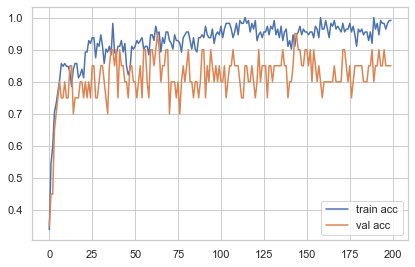

average acc = 0.9256696431338787
average val acc = 0.8172500072419644
max acc = 1.0
max val acc = 0.949999988079071


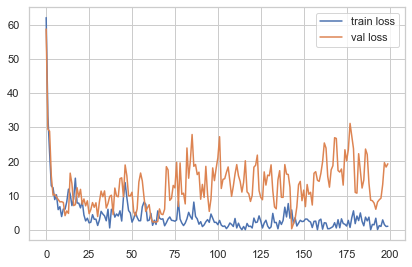

average loss = 3.8917614025977763
average val loss = 13.0743069152534
max loss = 62.089813232421875
max val loss = 58.754547119140625


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history8.history['accuracy'], label='train acc')
plt.plot(history8.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta8 = np.mean(history8.history['accuracy'])
print('average acc = {}'.format(ta8))
va8 = np.mean(history8.history['val_accuracy'])
print('average val acc = {}'.format(va8))
ta8a = np.max(history8.history['accuracy'])
print('max acc = {}'.format(ta8a))
va8a = np.max(history8.history['val_accuracy'])
print('max val acc = {}'.format(va8a))


# loss
plt.plot(history8.history['loss'], label='train loss')
plt.plot(history8.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl8 = np.mean(history8.history['loss'])
print('average loss = {}'.format(tl8))
vl8 = np.mean(history8.history['val_loss'])
print('average val loss = {}'.format(vl8))
tl8a = np.max(history8.history['loss'])
print('max loss = {}'.format(tl8a))
vl8a = np.max(history8.history['val_loss'])
print('max val loss = {}'.format(vl8a))

In [20]:
score8 = model8.evaluate(x_val8, y_val8,  verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Test loss: 19.296560287475586
Test accuracy: 0.8500000238418579


In [21]:
Y_pred8 = model8.predict_generator(x_test8)
y_pred8 = np.argmax(Y_pred8, axis=1)
y_test8 = np.argmax(y_test8, axis=1)
cm8 = confusion_matrix(y_test8, y_pred8)
print(cm8)

[[ 5  2  2  0]
 [ 1  8  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


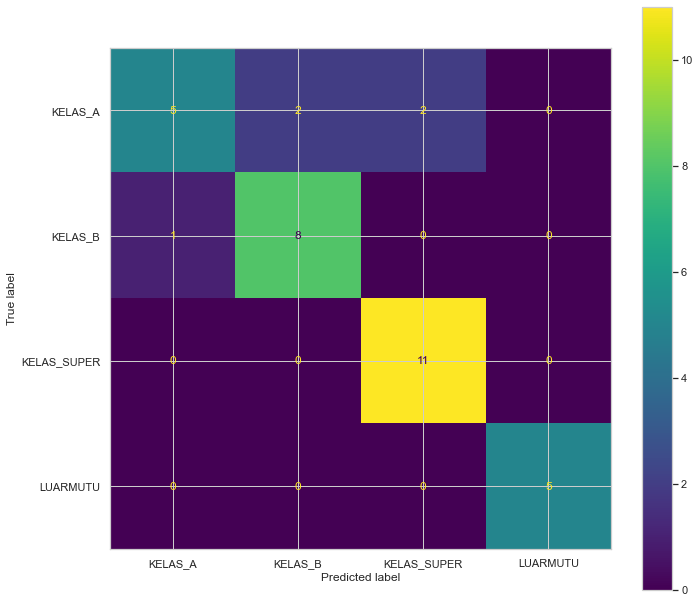

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test8, y_pred8, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test8, y_pred8, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.83      0.56      0.67         9
     KELAS_B       0.80      0.89      0.84         9
 KELAS_SUPER       0.85      1.00      0.92        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.85        34
   macro avg       0.87      0.86      0.86        34
weighted avg       0.85      0.85      0.84        34



# ---------------------------------------------------------

# Model 9

# Training

In [16]:
model9.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history9 = model9.fit(datagen.flow(x_train9, y_train9),
            validation_data=(x_val9, y_val9),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 29s 5s/step - loss: 2.2915 - accuracy: 0.3214 - val_loss: 0.8816 - val_accuracy: 0.6500
Epoch 2/200
4/4 [==============================] - 2s 461ms/step - loss: 1.3732 - accuracy: 0.4018 - val_loss: 0.9218 - val_accuracy: 0.5500
Epoch 3/200
4/4 [==============================] - 2s 473ms/step - loss: 0.8998 - accuracy: 0.6429 - val_loss: 0.9826 - val_accuracy: 0.7500
Epoch 4/200
4/4 [==============================] - 2s 413ms/step - loss: 0.7216 - accuracy: 0.7232 - val_loss: 1.2675 - val_accuracy: 0.4000
Epoch 5/200
4/4 [==============================] - 2s 531ms/step - loss: 0.6925 - accuracy: 0.7054 - val_loss: 1.0103 - val_accuracy: 0.4000
Epoch 6/200
4/4 [==============================] - 2s 423ms/step - loss: 0.5618 - accuracy: 0.7679 - val_loss: 0.6403 - val_accuracy: 0.6500
Epoch 7/200
4/4 [==============================] - 2s 470ms/step - loss: 0.4481 - accuracy: 0.8304 - val_loss: 0.6512 - val_accuracy: 0.6500
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 540ms/step - loss: 0.0883 - accuracy: 0.9821 - val_loss: 0.2931 - val_accuracy: 0.8500
Epoch 60/200
4/4 [==============================] - 2s 466ms/step - loss: 0.0902 - accuracy: 0.9821 - val_loss: 0.3260 - val_accuracy: 0.7500
Epoch 61/200
4/4 [==============================] - 2s 467ms/step - loss: 0.1931 - accuracy: 0.9375 - val_loss: 0.3340 - val_accuracy: 0.9000
Epoch 62/200
4/4 [==============================] - 2s 421ms/step - loss: 0.1547 - accuracy: 0.9375 - val_loss: 0.3075 - val_accuracy: 0.8500
Epoch 63/200
4/4 [==============================] - 2s 418ms/step - loss: 0.1286 - accuracy: 0.9643 - val_loss: 0.3381 - val_accuracy: 0.8500
Epoch 64/200
4/4 [==============================] - 2s 425ms/step - loss: 0.0822 - accuracy: 0.9643 - val_loss: 0.3541 - val_accuracy: 0.8500
Epoch 65/200
4/4 [==============================] - 2s 428ms/step - loss: 0.1058 - accuracy: 0.9643 - val_loss: 0.3460 - val_accuracy: 0.9000
Epoch 

4/4 [==============================] - 2s 457ms/step - loss: 0.0476 - accuracy: 0.9732 - val_loss: 0.3364 - val_accuracy: 0.9000
Epoch 174/200
4/4 [==============================] - 2s 473ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.3833 - val_accuracy: 0.9000
Epoch 175/200
4/4 [==============================] - 2s 537ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.3824 - val_accuracy: 0.9000
Epoch 176/200
4/4 [==============================] - 2s 480ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.3444 - val_accuracy: 0.9000
Epoch 177/200
4/4 [==============================] - 2s 480ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.3232 - val_accuracy: 0.9000
Epoch 178/200
4/4 [==============================] - 2s 531ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.4049 - val_accuracy: 0.9000
Epoch 179/200
4/4 [==============================] - 2s 478ms/step - loss: 0.0338 - accuracy: 0.9911 - val_loss: 0.3628 - val_accuracy: 0.9000
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history9.history

{'loss': [2.2915267944335938,
  1.37323796749115,
  0.899804949760437,
  0.721553385257721,
  0.6924988031387329,
  0.5617548823356628,
  0.4481174647808075,
  0.494581013917923,
  0.3313584625720978,
  0.4193045198917389,
  0.3973243534564972,
  0.38525447249412537,
  0.2689816355705261,
  0.3165587782859802,
  0.269686758518219,
  0.23132717609405518,
  0.27037838101387024,
  0.2310366928577423,
  0.2437140941619873,
  0.21812282502651215,
  0.20062728226184845,
  0.1448887437582016,
  0.18555131554603577,
  0.2369564026594162,
  0.23659077286720276,
  0.2291194647550583,
  0.29329949617385864,
  0.21719931066036224,
  0.24411971867084503,
  0.14849713444709778,
  0.18215247988700867,
  0.1524578481912613,
  0.190165176987648,
  0.13995228707790375,
  0.255913108587265,
  0.19527944922447205,
  0.18457984924316406,
  0.18571074306964874,
  0.15260447561740875,
  0.1390465945005417,
  0.17949585616588593,
  0.10079988092184067,
  0.14795248210430145,
  0.08823204785585403,
  0.1367733

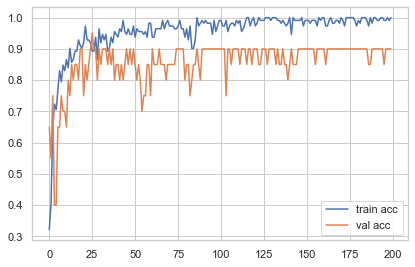

average acc = 0.9546874943375587
average val acc = 0.8574999937415123
max acc = 1.0
max val acc = 0.949999988079071


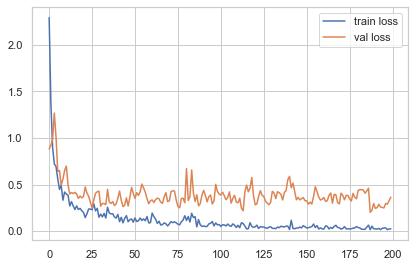

average loss = 0.127043323921971
average val loss = 0.3889318926632404
max loss = 2.2915267944335938
max val loss = 1.267460584640503


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history9.history['accuracy'], label='train acc')
plt.plot(history9.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta9 = np.mean(history9.history['accuracy'])
print('average acc = {}'.format(ta9))
va9 = np.mean(history9.history['val_accuracy'])
print('average val acc = {}'.format(va9))
ta9a = np.max(history9.history['accuracy'])
print('max acc = {}'.format(ta9a))
va9a = np.max(history9.history['val_accuracy'])
print('max val acc = {}'.format(va9a))

# loss
plt.plot(history9.history['loss'], label='train loss')
plt.plot(history9.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl9 = np.mean(history9.history['loss'])
print('average loss = {}'.format(tl9))
vl9 = np.mean(history9.history['val_loss'])
print('average val loss = {}'.format(vl9))
tl9a = np.max(history9.history['loss'])
print('max loss = {}'.format(tl9a))
vl9a = np.max(history9.history['val_loss'])
print('max val loss = {}'.format(vl9a))

In [20]:
score9 = model9.evaluate(x_val9, y_val9,  verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Test loss: 0.36407262086868286
Test accuracy: 0.8999999761581421


In [21]:
Y_pred9 = model9.predict_generator(x_test9)
y_pred9 = np.argmax(Y_pred9, axis=1)
y_test9 = np.argmax(y_test9, axis=1)
cm9 = confusion_matrix(y_test9, y_pred9)
print(cm9)

[[ 7  2  0  0]
 [ 0  9  0  0]
 [ 1  0 10  0]
 [ 0  0  0  5]]


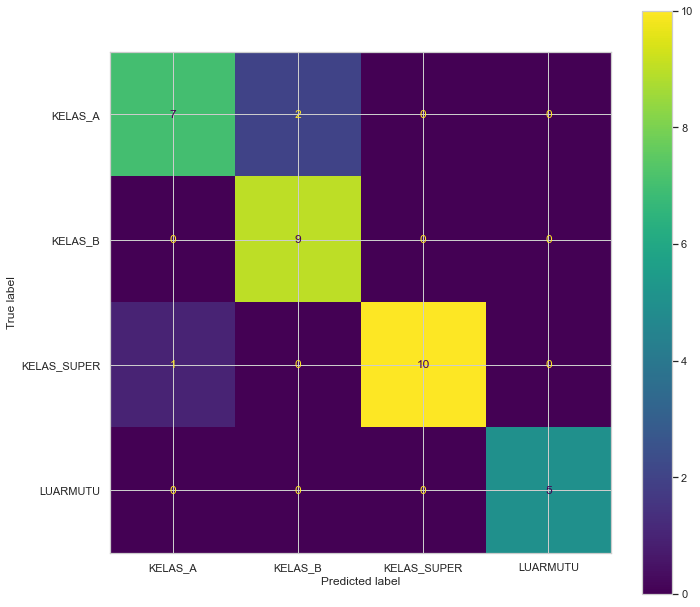

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test9, y_pred9, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test9, y_pred9, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.88      0.78      0.82         9
     KELAS_B       0.82      1.00      0.90         9
 KELAS_SUPER       1.00      0.91      0.95        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.91        34
   macro avg       0.92      0.92      0.92        34
weighted avg       0.92      0.91      0.91        34



# -----------------------------------------------------------------

# Model 10

# Training

In [16]:
model10.compile(optimizer=Adam(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history10 = model10.fit(datagen.flow(x_train10, y_train10),
            validation_data=(x_val10, y_val10),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 29s 5s/step - loss: 8.2443 - accuracy: 0.3393 - val_loss: 7.5522 - val_accuracy: 0.2500
Epoch 2/200
4/4 [==============================] - 2s 415ms/step - loss: 6.9732 - accuracy: 0.4732 - val_loss: 6.1311 - val_accuracy: 0.4000
Epoch 3/200
4/4 [==============================] - 2s 471ms/step - loss: 5.0408 - accuracy: 0.6250 - val_loss: 6.1927 - val_accuracy: 0.4500
Epoch 4/200
4/4 [==============================] - 2s 456ms/step - loss: 3.6747 - accuracy: 0.5804 - val_loss: 1.2234 - val_accuracy: 0.8000
Epoch 5/200
4/4 [==============================] - 2s 469ms/step - loss: 2.3891 - accuracy: 0.6607 - val_loss: 0.9973 - val_accuracy: 0.7500
Epoch 6/200
4/4 [==============================] - 2s 463ms/step - loss: 1.5374 - accuracy: 0.7232 - val_loss: 1.9412 - val_accuracy: 0.6500
Epoch 7/200
4/4 [==============================] - 2s 412ms/step - loss: 1.7808 - accuracy: 0.7143 - val_loss: 1.3623 - val_accuracy: 0.7000
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 432ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.7492 - val_accuracy: 0.9000
Epoch 60/200
4/4 [==============================] - 2s 437ms/step - loss: 0.1916 - accuracy: 0.9286 - val_loss: 0.6076 - val_accuracy: 0.9000
Epoch 61/200
4/4 [==============================] - 2s 487ms/step - loss: 0.2041 - accuracy: 0.9286 - val_loss: 0.5318 - val_accuracy: 0.9500
Epoch 62/200
4/4 [==============================] - 2s 434ms/step - loss: 0.5433 - accuracy: 0.8839 - val_loss: 0.5407 - val_accuracy: 0.9000
Epoch 63/200
4/4 [==============================] - 2s 490ms/step - loss: 0.3857 - accuracy: 0.9286 - val_loss: 2.0374 - val_accuracy: 0.8000
Epoch 64/200
4/4 [==============================] - 2s 579ms/step - loss: 0.4254 - accuracy: 0.9196 - val_loss: 0.9524 - val_accuracy: 0.8500
Epoch 65/200
4/4 [==============================] - 2s 479ms/step - loss: 0.9541 - accuracy: 0.8750 - val_loss: 1.6832 - val_accuracy: 0.8000
Epoch 

4/4 [==============================] - 2s 496ms/step - loss: 0.1338 - accuracy: 0.9821 - val_loss: 1.0925 - val_accuracy: 0.8500
Epoch 174/200
4/4 [==============================] - 2s 487ms/step - loss: 0.2849 - accuracy: 0.9643 - val_loss: 0.7387 - val_accuracy: 0.9000
Epoch 175/200
4/4 [==============================] - 2s 492ms/step - loss: 0.1721 - accuracy: 0.9643 - val_loss: 0.7771 - val_accuracy: 0.9000
Epoch 176/200
4/4 [==============================] - 2s 495ms/step - loss: 0.0453 - accuracy: 0.9821 - val_loss: 1.0323 - val_accuracy: 0.8500
Epoch 177/200
4/4 [==============================] - 2s 454ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 1.2480 - val_accuracy: 0.8000
Epoch 178/200
4/4 [==============================] - 2s 576ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.8837 - val_accuracy: 0.7500
Epoch 179/200
4/4 [==============================] - 2s 442ms/step - loss: 0.1415 - accuracy: 0.9464 - val_loss: 1.1228 - val_accuracy: 0.8500
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history10.history

{'loss': [8.244332313537598,
  6.973243713378906,
  5.040814399719238,
  3.6747357845306396,
  2.3891029357910156,
  1.5373764038085938,
  1.780818223953247,
  1.0106303691864014,
  0.8891733288764954,
  0.9965100884437561,
  1.1975289583206177,
  1.0265384912490845,
  0.6681424975395203,
  0.35950061678886414,
  0.7997637987136841,
  0.501396894454956,
  0.49350523948669434,
  0.3591608703136444,
  0.4428098797798157,
  0.6606965661048889,
  0.5064438581466675,
  0.17562027275562286,
  0.49850600957870483,
  0.3679317831993103,
  0.40391501784324646,
  0.49492311477661133,
  0.5104290246963501,
  0.46554094552993774,
  0.4665866792201996,
  0.265919953584671,
  0.22698195278644562,
  0.34917423129081726,
  0.32494041323661804,
  0.7177934050559998,
  0.3234664797782898,
  0.24675655364990234,
  0.32715511322021484,
  0.3565148413181305,
  0.17452512681484222,
  0.15633773803710938,
  0.2072209119796753,
  0.29959288239479065,
  0.17001767456531525,
  0.3148224651813507,
  0.3080462813

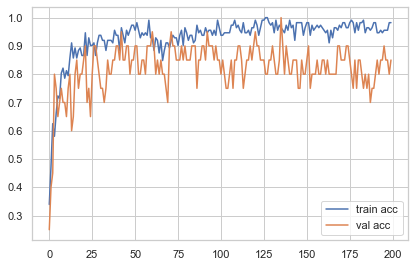

average acc = 0.9301339292526245
average val acc = 0.82250000461936
max acc = 1.0
max val acc = 1.0


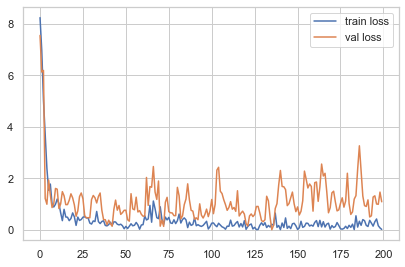

average loss = 0.4195957067655399
average val loss = 1.1266042566578836
max loss = 8.244332313537598
max val loss = 7.552218437194824


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history10.history['accuracy'], label='train acc')
plt.plot(history10.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta10 = np.mean(history10.history['accuracy'])
print('average acc = {}'.format(ta10))
va10 = np.mean(history10.history['val_accuracy'])
print('average val acc = {}'.format(va10))
ta10a = np.max(history10.history['accuracy'])
print('max acc = {}'.format(ta10a))
va10a = np.max(history10.history['val_accuracy'])
print('max val acc = {}'.format(va10a))

# loss
plt.plot(history10.history['loss'], label='train loss')
plt.plot(history10.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl10 = np.mean(history10.history['loss'])
print('average loss = {}'.format(tl10))
vl10 = np.mean(history10.history['val_loss'])
print('average val loss = {}'.format(vl10))
tl10a = np.max(history10.history['loss'])
print('max loss = {}'.format(tl10a))
vl10a = np.max(history10.history['val_loss'])
print('max val loss = {}'.format(vl10a))

In [20]:
score10 = model10.evaluate(x_val10, y_val10,  verbose=0)
print('Test loss:', score10[0])
print('Test accuracy:', score10[1])

Test loss: 1.092087984085083
Test accuracy: 0.8500000238418579


In [21]:
Y_pred10 = model10.predict_generator(x_test10)
y_pred10 = np.argmax(Y_pred10, axis=1)
y_test10 = np.argmax(y_test10, axis=1)
cm10 = confusion_matrix(y_test10, y_pred10)
print(cm10)


[[ 5  3  1  0]
 [ 2  7  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


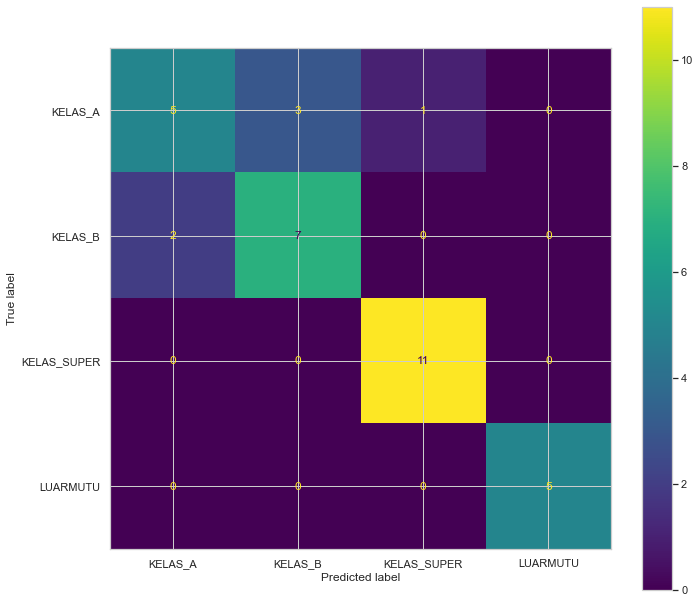

In [23]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test10, y_pred10, ax=ax, display_labels=target_names)
plt.show()

In [24]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test10, y_pred10, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.71      0.56      0.63         9
     KELAS_B       0.70      0.78      0.74         9
 KELAS_SUPER       0.92      1.00      0.96        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.82        34
   macro avg       0.83      0.83      0.83        34
weighted avg       0.82      0.82      0.82        34



# --------------------------------------------------------

# Model 11

# training

In [16]:
model11.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history11 = model11.fit(datagen.flow(x_train11,y_train11),
            validation_data=(x_val11, y_val11),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 29s 5s/step - loss: 1.6040 - accuracy: 0.2768 - val_loss: 1.6524 - val_accuracy: 0.3500
Epoch 2/200
4/4 [==============================] - 2s 465ms/step - loss: 1.4120 - accuracy: 0.3661 - val_loss: 1.5249 - val_accuracy: 0.3500
Epoch 3/200
4/4 [==============================] - 2s 469ms/step - loss: 1.2561 - accuracy: 0.4554 - val_loss: 1.3803 - val_accuracy: 0.4500
Epoch 4/200
4/4 [==============================] - 2s 466ms/step - loss: 1.1201 - accuracy: 0.5089 - val_loss: 1.3010 - val_accuracy: 0.4500
Epoch 5/200
4/4 [==============================] - 2s 474ms/step - loss: 1.0689 - accuracy: 0.5536 - val_loss: 1.2234 - val_accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 2s 472ms/step - loss: 0.9205 - accuracy: 0.5714 - val_loss: 1.1331 - val_accuracy: 0.5000
Epoch 7/200
4/4 [==============================] - 2s 468ms/step - loss: 0.8701 - accuracy: 0.6161 - val_loss: 1.0626 - val_accuracy: 0.6500
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 474ms/step - loss: 0.3125 - accuracy: 0.8571 - val_loss: 0.4043 - val_accuracy: 0.8500
Epoch 60/200
4/4 [==============================] - 2s 469ms/step - loss: 0.3554 - accuracy: 0.8304 - val_loss: 0.3972 - val_accuracy: 0.8500
Epoch 61/200
4/4 [==============================] - 2s 468ms/step - loss: 0.3880 - accuracy: 0.7946 - val_loss: 0.3954 - val_accuracy: 0.8500
Epoch 62/200
4/4 [==============================] - 2s 481ms/step - loss: 0.3352 - accuracy: 0.8482 - val_loss: 0.4024 - val_accuracy: 0.8500
Epoch 63/200
4/4 [==============================] - 2s 549ms/step - loss: 0.3584 - accuracy: 0.8839 - val_loss: 0.4285 - val_accuracy: 0.8500
Epoch 64/200
4/4 [==============================] - 2s 425ms/step - loss: 0.3133 - accuracy: 0.9018 - val_loss: 0.4433 - val_accuracy: 0.8000
Epoch 65/200
4/4 [==============================] - 2s 473ms/step - loss: 0.3345 - accuracy: 0.8661 - val_loss: 0.4432 - val_accuracy: 0.8000
Epoch 

4/4 [==============================] - 2s 490ms/step - loss: 0.1688 - accuracy: 0.9554 - val_loss: 0.3353 - val_accuracy: 0.9000
Epoch 174/200
4/4 [==============================] - 2s 475ms/step - loss: 0.1574 - accuracy: 0.9643 - val_loss: 0.3432 - val_accuracy: 0.9000
Epoch 175/200
4/4 [==============================] - 2s 487ms/step - loss: 0.1435 - accuracy: 0.9821 - val_loss: 0.3412 - val_accuracy: 0.9000
Epoch 176/200
4/4 [==============================] - 2s 438ms/step - loss: 0.1260 - accuracy: 0.9821 - val_loss: 0.3473 - val_accuracy: 0.9000
Epoch 177/200
4/4 [==============================] - 2s 496ms/step - loss: 0.1637 - accuracy: 0.9464 - val_loss: 0.3535 - val_accuracy: 0.9000
Epoch 178/200
4/4 [==============================] - 2s 431ms/step - loss: 0.1634 - accuracy: 0.9464 - val_loss: 0.3587 - val_accuracy: 0.9000
Epoch 179/200
4/4 [==============================] - 2s 503ms/step - loss: 0.1502 - accuracy: 0.9643 - val_loss: 0.3764 - val_accuracy: 0.9000
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history11.history

{'loss': [1.6039955615997314,
  1.4120107889175415,
  1.2560955286026,
  1.1200530529022217,
  1.068931221961975,
  0.9204850792884827,
  0.870147705078125,
  0.8877609372138977,
  0.7546247839927673,
  0.7908957600593567,
  0.7054436802864075,
  0.6289343237876892,
  0.7208667397499084,
  0.5930085778236389,
  0.6485682129859924,
  0.6499599814414978,
  0.5319721102714539,
  0.5653933882713318,
  0.5528358817100525,
  0.536961555480957,
  0.5207033753395081,
  0.5094287991523743,
  0.4593489170074463,
  0.42938461899757385,
  0.4449180066585541,
  0.4579603672027588,
  0.4298925995826721,
  0.4673127830028534,
  0.4695657193660736,
  0.4155116081237793,
  0.4717513620853424,
  0.44778749346733093,
  0.4075360596179962,
  0.4144608974456787,
  0.39521774649620056,
  0.47174277901649475,
  0.36800214648246765,
  0.4013209044933319,
  0.36738109588623047,
  0.3906383216381073,
  0.41448545455932617,
  0.3558599054813385,
  0.3547901213169098,
  0.36437517404556274,
  0.3541363775730133,


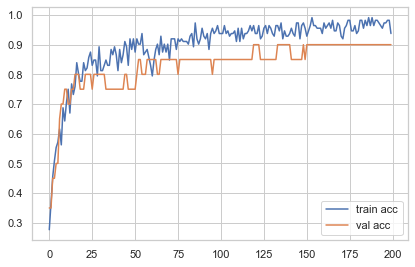

average acc = 0.8957142868638038
average val acc = 0.831250002682209
max acc = 0.9910714030265808
max val acc = 0.8999999761581421


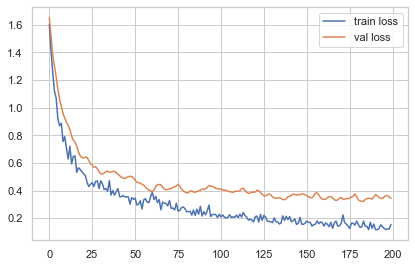

average loss = 0.3020122191309929
average val loss = 0.46643734112381935
max loss = 1.6039955615997314
max val loss = 1.6523622274398804


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history11.history['accuracy'], label='train acc')
plt.plot(history11.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta11 = np.mean(history11.history['accuracy'])
print('average acc = {}'.format(ta11))
va11 = np.mean(history11.history['val_accuracy'])
print('average val acc = {}'.format(va11))
ta11a = np.max(history11.history['accuracy'])
print('max acc = {}'.format(ta11a))
va11a = np.max(history11.history['val_accuracy'])
print('max val acc = {}'.format(va11a))


# loss
plt.plot(history11.history['loss'], label='train loss')
plt.plot(history11.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl11 = np.mean(history11.history['loss'])
print('average loss = {}'.format(tl11))
vl11 = np.mean(history11.history['val_loss'])
print('average val loss = {}'.format(vl11))
tl11a = np.max(history11.history['loss'])
print('max loss = {}'.format(tl11a))
vl11a = np.max(history11.history['val_loss'])
print('max val loss = {}'.format(vl11a))

In [20]:
score11 = model11.evaluate(x_val11, y_val11,  verbose=0)
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])

Test loss: 0.34327951073646545
Test accuracy: 0.8999999761581421


In [21]:
Y_pred11 = model11.predict_generator(x_test11)
y_pred11 = np.argmax(Y_pred11, axis=1)
y_test11 = np.argmax(y_test11, axis=1)
cm11 = confusion_matrix(y_test11, y_pred11)
print(cm11)

[[6 3 0 0]
 [0 9 0 0]
 [2 0 9 0]
 [0 0 0 5]]


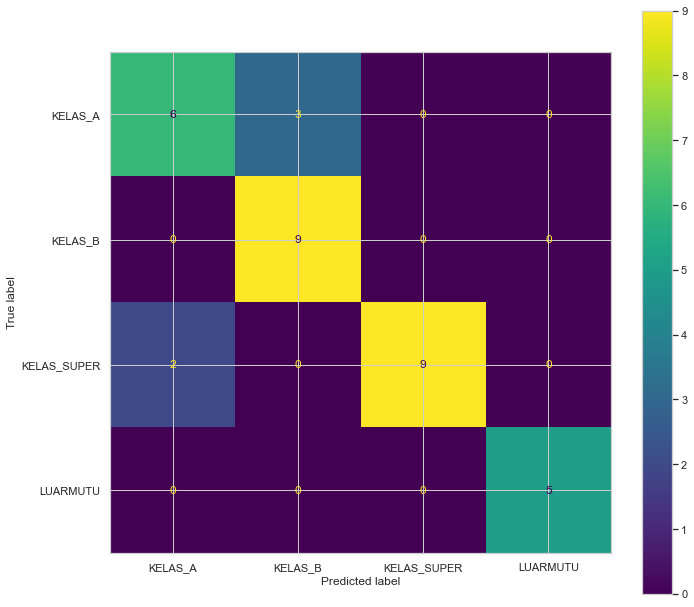

In [22]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test11, y_pred11, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test11, y_pred11, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.75      0.67      0.71         9
     KELAS_B       0.75      1.00      0.86         9
 KELAS_SUPER       1.00      0.82      0.90        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.85        34
   macro avg       0.88      0.87      0.87        34
weighted avg       0.87      0.85      0.85        34



# -----------------------------------------------------------

# Model 12

# training

In [16]:
model12.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history12 =model12.fit(datagen.flow(x_train12, y_train12),
            validation_data=(x_val12, y_val12),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 29s 5s/step - loss: 1.5053 - accuracy: 0.3214 - val_loss: 1.3309 - val_accuracy: 0.4000
Epoch 2/200
4/4 [==============================] - 2s 425ms/step - loss: 0.9922 - accuracy: 0.6071 - val_loss: 0.9477 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 2s 536ms/step - loss: 0.7535 - accuracy: 0.6339 - val_loss: 0.7716 - val_accuracy: 0.6000
Epoch 4/200
4/4 [==============================] - 2s 554ms/step - loss: 0.6889 - accuracy: 0.6786 - val_loss: 0.9088 - val_accuracy: 0.5500
Epoch 5/200
4/4 [==============================] - 2s 476ms/step - loss: 0.5697 - accuracy: 0.7589 - val_loss: 0.7678 - val_accuracy: 0.7000
Epoch 6/200
4/4 [==============================] - 2s 429ms/step - loss: 0.6228 - accuracy: 0.6964 - val_loss: 0.6248 - val_accuracy: 0.7000
Epoch 7/200
4/4 [==============================] - 2s 492ms/step - loss: 0.4151 - accuracy: 0.8482 - val_loss: 0.5526 - val_accuracy: 0.8000
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 444ms/step - loss: 0.1222 - accuracy: 0.9643 - val_loss: 0.4999 - val_accuracy: 0.8500
Epoch 60/200
4/4 [==============================] - 2s 442ms/step - loss: 0.1265 - accuracy: 0.9643 - val_loss: 0.4484 - val_accuracy: 0.8500
Epoch 61/200
4/4 [==============================] - 2s 440ms/step - loss: 0.1232 - accuracy: 0.9643 - val_loss: 0.4107 - val_accuracy: 0.9000
Epoch 62/200
4/4 [==============================] - 2s 572ms/step - loss: 0.1054 - accuracy: 0.9821 - val_loss: 0.4368 - val_accuracy: 0.8000
Epoch 63/200
4/4 [==============================] - 2s 489ms/step - loss: 0.1499 - accuracy: 0.9375 - val_loss: 0.3974 - val_accuracy: 0.8500
Epoch 64/200
4/4 [==============================] - 2s 488ms/step - loss: 0.1122 - accuracy: 0.9732 - val_loss: 0.4069 - val_accuracy: 0.9000
Epoch 65/200
4/4 [==============================] - 2s 449ms/step - loss: 0.1233 - accuracy: 0.9732 - val_loss: 0.4680 - val_accuracy: 0.9000
Epoch 

4/4 [==============================] - 2s 481ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.4734 - val_accuracy: 0.9000
Epoch 174/200
4/4 [==============================] - 2s 436ms/step - loss: 0.0544 - accuracy: 0.9911 - val_loss: 0.4025 - val_accuracy: 0.9000
Epoch 175/200
4/4 [==============================] - 2s 440ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.3499 - val_accuracy: 0.8500
Epoch 176/200
4/4 [==============================] - 2s 558ms/step - loss: 0.0480 - accuracy: 0.9911 - val_loss: 0.3416 - val_accuracy: 0.8500
Epoch 177/200
4/4 [==============================] - 2s 492ms/step - loss: 0.0408 - accuracy: 0.9911 - val_loss: 0.3886 - val_accuracy: 0.8500
Epoch 178/200
4/4 [==============================] - 2s 489ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 0.4425 - val_accuracy: 0.9000
Epoch 179/200
4/4 [==============================] - 2s 484ms/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 0.3746 - val_accuracy: 0.8500
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history12.history

{'loss': [1.5052980184555054,
  0.9922385811805725,
  0.7535492777824402,
  0.6889104843139648,
  0.5697293877601624,
  0.6227735877037048,
  0.415129691362381,
  0.44229891896247864,
  0.44963783025741577,
  0.38833051919937134,
  0.32228729128837585,
  0.29755735397338867,
  0.33214443922042847,
  0.33430010080337524,
  0.4428124725818634,
  0.27272772789001465,
  0.28538602590560913,
  0.21432927250862122,
  0.2704468369483948,
  0.20069360733032227,
  0.25460129976272583,
  0.24965623021125793,
  0.24831633269786835,
  0.2662127912044525,
  0.23420701920986176,
  0.23297889530658722,
  0.1717725247144699,
  0.23711125552654266,
  0.16597440838813782,
  0.2376805692911148,
  0.256442129611969,
  0.20181331038475037,
  0.21841251850128174,
  0.19843128323554993,
  0.14890684187412262,
  0.17479416728019714,
  0.16545680165290833,
  0.17166638374328613,
  0.174491748213768,
  0.18087740242481232,
  0.18298980593681335,
  0.2051609307527542,
  0.17576313018798828,
  0.1780136376619339,

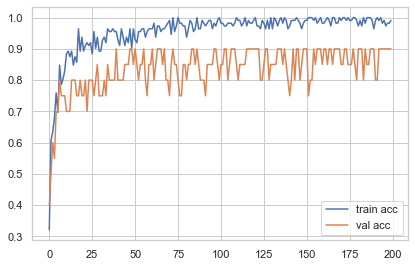

average acc = 0.9550892819464206
average val acc = 0.8357500006258488
max acc = 1.0
max val acc = 0.8999999761581421


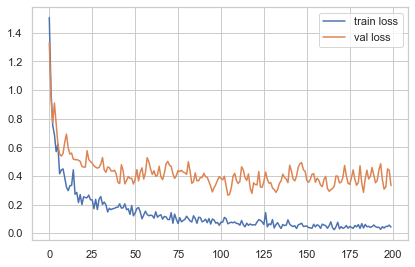

average loss = 0.13404180564917623
average val loss = 0.421851451843977
max loss = 1.5052980184555054
max val loss = 1.330932378768921


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history12.history['accuracy'], label='train acc')
plt.plot(history12.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta12 = np.mean(history12.history['accuracy'])
print('average acc = {}'.format(ta12))
va12 = np.mean(history12.history['val_accuracy'])
print('average val acc = {}'.format(va12))
ta12a = np.max(history12.history['accuracy'])
print('max acc = {}'.format(ta12a))
va12a = np.max(history12.history['val_accuracy'])
print('max val acc = {}'.format(va12a))

# loss
plt.plot(history12.history['loss'], label='train loss')
plt.plot(history12.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl12 = np.mean(history12.history['loss'])
print('average loss = {}'.format(tl12))
vl12 = np.mean(history12.history['val_loss'])
print('average val loss = {}'.format(vl12))
tl12a = np.max(history12.history['loss'])
print('max loss = {}'.format(tl12a))
vl12a = np.max(history12.history['val_loss'])
print('max val loss = {}'.format(vl12a))

In [23]:
score12 = model12.evaluate(x_val12, y_val12,  verbose=0)
print('Test loss:', score12[0])
print('Test accuracy:', score12[1])

Test loss: 0.3329232335090637
Test accuracy: 0.8999999761581421


In [21]:
Y_pred12 = model12.predict_generator(x_test12)
y_pred12 = np.argmax(Y_pred12, axis=1)
y_test12 = np.argmax(y_test12, axis=1)
cm12 = confusion_matrix(y_test12, y_pred12)
print(cm12)

[[ 9  0  0  0]
 [ 1  8  0  0]
 [ 1  0 10  0]
 [ 0  0  0  5]]


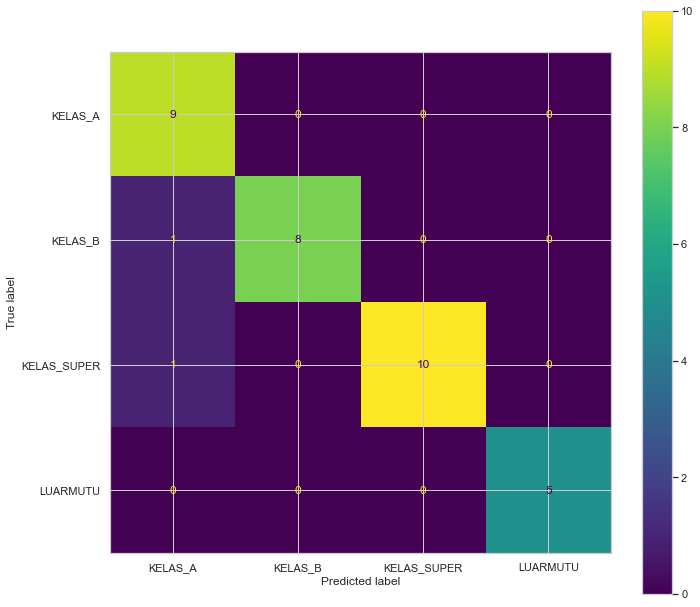

In [24]:
fig,ax= plt.subplots(figsize=(10,10))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test12, y_pred12, ax=ax, display_labels=target_names)
plt.show()

In [25]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test12, y_pred12, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.82      1.00      0.90         9
     KELAS_B       1.00      0.89      0.94         9
 KELAS_SUPER       1.00      0.91      0.95        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.94        34
   macro avg       0.95      0.95      0.95        34
weighted avg       0.95      0.94      0.94        34



# Implementasi Dropout ke model terbaik dengan epochs 100
# sesuaikan kembali Lr

# model x dengan dropout 0.25

In [ ]:
xa = tf.keras.layers.Flatten()(last_output)
xa = tf.keras.layers.Dropout(0.25)(xa)
xa = tf.keras.layers.Dense(4, activation='softmax')(xa)
model13 = tf.keras.Model(inceptionv3.input, xa)
model13.summary()

In [ ]:
model13.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history13 = model13.fit(datagen.flow(x_train13, y_train13),
            validation_data=(x_val13, y_val13),
            epochs=100)

# evaluasi test dan visualisasi

In [ ]:
history13.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history13.history['accuracy'], label='train acc')
plt.plot(history13.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta13 = np.mean(history13.history['accuracy'])
print('average acc = {}'.format(ta13))
va13 = np.mean(history13.history['val_accuracy'])
print('average val acc = {}'.format(va13))
ta13a = np.max(history13.history['accuracy'])
print('max acc = {}'.format(ta13a))
va13a = np.max(history13.history['val_accuracy'])
print('max val acc = {}'.format(va13a))

# loss
plt.plot(history13.history['loss'], label='train loss')
plt.plot(history13.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl13 = np.mean(history13.history['loss'])
print('average loss = {}'.format(tl13))
vl13 = np.mean(history13.history['val_loss'])
print('average val loss = {}'.format(vl13))
tl13a = np.max(history13.history['loss'])
print('max loss = {}'.format(tl13a))
vl13a = np.max(history13.history['val_loss'])
print('max val loss = {}'.format(vl13a))

In [ ]:
score13 = model13.evaluate(x_val13, y_val13,  verbose=0)
print('Test loss:', score13[0])
print('Test accuracy:', score13[1])

In [ ]:
Y_pred13 = model13.predict_generator(x_test13)
y_pred13 = np.argmax(Y_pred13, axis=1)
y_test13 = np.argmax(y_test13, axis=1)
cm13 = confusion_matrix(y_test13, y_pred13)
print(cm13)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test13, y_pred13, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test13, y_pred13, target_names=target_names))

# -------------------------------------------------------

# model x dengan dropout 0.5

In [ ]:
xb = tf.keras.layers.Flatten()(last_output)
xb = tf.keras.layers.Dropout(0.5)(xb)
xb = tf.keras.layers.Dense(4, activation='softmax')(xb)
model14 = tf.keras.Model(inceptionv3.input, xb)
model14.summary()

In [ ]:
model14.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history14 = model14.fit(datagen.flow(x_train14, y_train14),
            validation_data=(x_val14, y_val14),
            epochs=100)

# evaluasi test dan visualisasi

In [ ]:
history14.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history14.history['accuracy'], label='train acc')
plt.plot(history14.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta14 = np.mean(history14.history['accuracy'])
print('average acc = {}'.format(ta14))
va14 = np.mean(history14.history['val_accuracy'])
print('average val acc = {}'.format(va14))
ta14a = np.max(history14.history['accuracy'])
print('max acc = {}'.format(ta14a))
va14a = np.max(history14.history['val_accuracy'])
print('max val acc = {}'.format(va14a))

# loss
plt.plot(history14.history['loss'], label='train loss')
plt.plot(history14.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl14 = np.mean(history14.history['loss'])
print('average loss = {}'.format(tl14))
vl14 = np.mean(history14.history['val_loss'])
print('average val loss = {}'.format(vl14))
tl14a = np.max(history14.history['loss'])
print('max loss = {}'.format(tl14a))
vl14a = np.max(history14.history['val_loss'])
print('max val loss = {}'.format(vl14a))

In [ ]:
score14 = model14.evaluate(x_val14, y_val14,  verbose=0)
print('Test loss:', score14[0])
print('Test accuracy:', score14[1])

In [ ]:
Y_pred14 = model14.predict_generator(x_test14)
y_pred14 = np.argmax(Y_pred14, axis=1)
y_test14 = np.argmax(y_test14, axis=1)
cm14 = confusion_matrix(y_test14, y_pred14)
print(cm14)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test14, y_pred14, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test14, y_pred14, target_names=target_names))

# -----------------------------------------------------------

# model x dengan dropout 0.75

In [ ]:
xc = tf.keras.layers.Flatten()(last_output)
xc = tf.keras.layers.Dropout(0.75)(xc)
xc = tf.keras.layers.Dense(4, activation='softmax')(xc)
model15 = tf.keras.Model(inceptionv3.input, xc)
model15.summary()

In [ ]:
model15.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history15=model15.fit(datagen.flow(x_train15, y_train15),
            validation_data=(x_val15, y_val15),
            epochs=100)

# evaluasi testing dan visualisasi

In [ ]:
history15.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history15.history['accuracy'], label='train acc')
plt.plot(history15.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta15 = np.mean(history15.history['accuracy'])
print('average acc = {}'.format(ta15))
va15 = np.mean(history15.history['val_accuracy'])
print('average val acc = {}'.format(va15))
ta15a = np.max(history15.history['accuracy'])
print('max acc = {}'.format(ta15a))
va15a = np.max(history15.history['val_accuracy'])
print('max val acc = {}'.format(va15a))

# loss
plt.plot(history15.history['loss'], label='train loss')
plt.plot(history15.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl15 = np.mean(history15.history['loss'])
print('average loss = {}'.format(tl15))
vl15 = np.mean(history15.history['val_loss'])
print('average val loss = {}'.format(vl15))
tl15a = np.max(history15.history['loss'])
print('max loss = {}'.format(tl15a))
vl15a = np.max(history15.history['val_loss'])
print('max val loss = {}'.format(vl15a))

In [ ]:
score15 = model15.evaluate(x_val15, y_val15,  verbose=0)
print('Test loss:', score15[0])
print('Test accuracy:', score15[1])

In [ ]:
Y_pred15 = model15.predict_generator(x_test15)
y_pred15 = np.argmax(Y_pred15, axis=1)
y_test15 = np.argmax(y_test15, axis=1)
cm15 = confusion_matrix(y_test15, y_pred15)
print(cm15)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test15, y_pred15, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test15, y_pred15, target_names=target_names))

# --------------------------------------------------------------------------------

# Implementasi Dropout ke model terbaik dengan epochs 200
# sesuaikan kembali Lr

# Model x dengan dropout 0.25

# Training

In [14]:
xd = tf.keras.layers.Flatten()(last_output)
xd = tf.keras.layers.Dropout(0.25)(xd)
xd = tf.keras.layers.Dense(4, activation='softmax')(xd)
model16 = tf.keras.Model(inceptionv3.input, xd)
model16.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
model16.compile(optimizer=Adam(lr=0.00005), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history16 = model16.fit(datagen.flow(x_train16, y_train16),
            validation_data=(x_val16, y_val16),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 15s 1s/step - loss: 1.7464 - accuracy: 0.3304 - val_loss: 1.3188 - val_accuracy: 0.3500
Epoch 2/200
4/4 [==============================] - 2s 434ms/step - loss: 1.2184 - accuracy: 0.3929 - val_loss: 1.1054 - val_accuracy: 0.5500
Epoch 3/200
4/4 [==============================] - 2s 421ms/step - loss: 0.8599 - accuracy: 0.6161 - val_loss: 1.0679 - val_accuracy: 0.5500
Epoch 4/200
4/4 [==============================] - 2s 428ms/step - loss: 0.8339 - accuracy: 0.6786 - val_loss: 1.0942 - val_accuracy: 0.6000
Epoch 5/200
4/4 [==============================] - 1s 341ms/step - loss: 0.7671 - accuracy: 0.6607 - val_loss: 1.0788 - val_accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 2s 347ms/step - loss: 0.5941 - accuracy: 0.7589 - val_loss: 0.9534 - val_accuracy: 0.6500
Epoch 7/200
4/4 [==============================] - 2s 352ms/step - loss: 0.5475 - accuracy: 0.7946 - val_loss: 0.8858 - val_accuracy: 0.7000
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 364ms/step - loss: 0.1564 - accuracy: 0.9464 - val_loss: 0.3993 - val_accuracy: 0.8500
Epoch 60/200
4/4 [==============================] - 2s 442ms/step - loss: 0.1619 - accuracy: 0.9196 - val_loss: 0.4592 - val_accuracy: 0.8500
Epoch 61/200
4/4 [==============================] - 2s 347ms/step - loss: 0.1277 - accuracy: 0.9643 - val_loss: 0.4084 - val_accuracy: 0.8500
Epoch 62/200
4/4 [==============================] - 2s 362ms/step - loss: 0.1281 - accuracy: 0.9464 - val_loss: 0.3879 - val_accuracy: 0.8500
Epoch 63/200
4/4 [==============================] - 2s 355ms/step - loss: 0.1889 - accuracy: 0.9286 - val_loss: 0.4213 - val_accuracy: 0.8500
Epoch 64/200
4/4 [==============================] - 2s 357ms/step - loss: 0.1322 - accuracy: 0.9554 - val_loss: 0.4402 - val_accuracy: 0.8500
Epoch 65/200
4/4 [==============================] - 2s 359ms/step - loss: 0.1169 - accuracy: 0.9643 - val_loss: 0.3912 - val_accuracy: 0.8500
Epoch 

4/4 [==============================] - 2s 453ms/step - loss: 0.1158 - accuracy: 0.9375 - val_loss: 0.3159 - val_accuracy: 0.9000
Epoch 174/200
4/4 [==============================] - 2s 362ms/step - loss: 0.0825 - accuracy: 0.9821 - val_loss: 0.4010 - val_accuracy: 0.9000
Epoch 175/200
4/4 [==============================] - 2s 386ms/step - loss: 0.0743 - accuracy: 0.9643 - val_loss: 0.4275 - val_accuracy: 0.9000
Epoch 176/200
4/4 [==============================] - 2s 348ms/step - loss: 0.0737 - accuracy: 0.9821 - val_loss: 0.3429 - val_accuracy: 0.9000
Epoch 177/200
4/4 [==============================] - 2s 363ms/step - loss: 0.0754 - accuracy: 0.9554 - val_loss: 0.3340 - val_accuracy: 0.9000
Epoch 178/200
4/4 [==============================] - 2s 381ms/step - loss: 0.0449 - accuracy: 0.9911 - val_loss: 0.4294 - val_accuracy: 0.9000
Epoch 179/200
4/4 [==============================] - 2s 367ms/step - loss: 0.0553 - accuracy: 0.9821 - val_loss: 0.3964 - val_accuracy: 0.9000
Epoch 180/200

# evaluasi testing dan visualisasi

In [17]:
history16.history

{'loss': [1.7464110851287842,
  1.2183903455734253,
  0.859895646572113,
  0.8339045643806458,
  0.7671328783035278,
  0.5940766930580139,
  0.5475314855575562,
  0.5864158868789673,
  0.4751981198787689,
  0.41679343581199646,
  0.5042901635169983,
  0.4842444062232971,
  0.42658838629722595,
  0.35132524371147156,
  0.3194398283958435,
  0.394955575466156,
  0.31296342611312866,
  0.3239213526248932,
  0.3297021985054016,
  0.33485740423202515,
  0.3332133889198303,
  0.33387136459350586,
  0.3617515563964844,
  0.27871403098106384,
  0.24576139450073242,
  0.28605374693870544,
  0.24308636784553528,
  0.2729246914386749,
  0.20596759021282196,
  0.25867167115211487,
  0.2225707471370697,
  0.2873890995979309,
  0.2419712245464325,
  0.2912333309650421,
  0.24782590568065643,
  0.232222780585289,
  0.14662782847881317,
  0.2771322727203369,
  0.22035858035087585,
  0.190057173371315,
  0.2949705421924591,
  0.22103993594646454,
  0.2177349030971527,
  0.24874244630336761,
  0.2404644

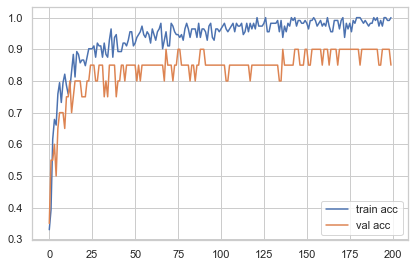

average acc = 0.9380357122421265
average val acc = 0.8390000073611736
max acc = 1.0
max val acc = 0.8999999761581421


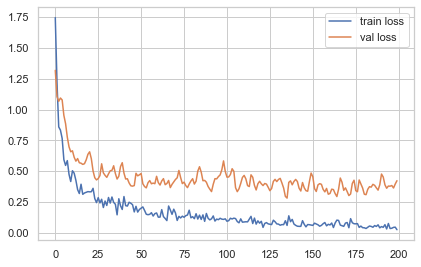

average loss = 0.16750167800113558
average val loss = 0.4495279242098331
max loss = 1.7464110851287842
max val loss = 1.3188447952270508


In [18]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history16.history['accuracy'], label='train acc')
plt.plot(history16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta16 = np.mean(history16.history['accuracy'])
print('average acc = {}'.format(ta16))
va16 = np.mean(history16.history['val_accuracy'])
print('average val acc = {}'.format(va16))
ta16a = np.max(history16.history['accuracy'])
print('max acc = {}'.format(ta16a))
va16a = np.max(history16.history['val_accuracy'])
print('max val acc = {}'.format(va16a))

# loss
plt.plot(history16.history['loss'], label='train loss')
plt.plot(history16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl16 = np.mean(history16.history['loss'])
print('average loss = {}'.format(tl16))
vl16 = np.mean(history16.history['val_loss'])
print('average val loss = {}'.format(vl16))
tl16a = np.max(history16.history['loss'])
print('max loss = {}'.format(tl16a))
vl16a = np.max(history16.history['val_loss'])
print('max val loss = {}'.format(vl16a))

In [19]:
score16 = model16.evaluate(x_val16, y_val16,  verbose=0)
print('Test loss:', score16[0])
print('Test accuracy:', score16[1])

Test loss: 0.4234960973262787
Test accuracy: 0.8500000238418579


In [20]:
Y_pred16 = model16.predict_generator(x_test16)
y_pred16 = np.argmax(Y_pred16, axis=1)
y_test16 = np.argmax(y_test16, axis=1)
cm16 = confusion_matrix(y_test16, y_pred16)
print(cm16)

[[ 5  1  3  0]
 [ 1  8  0  0]
 [ 1  0 10  0]
 [ 0  0  0  5]]


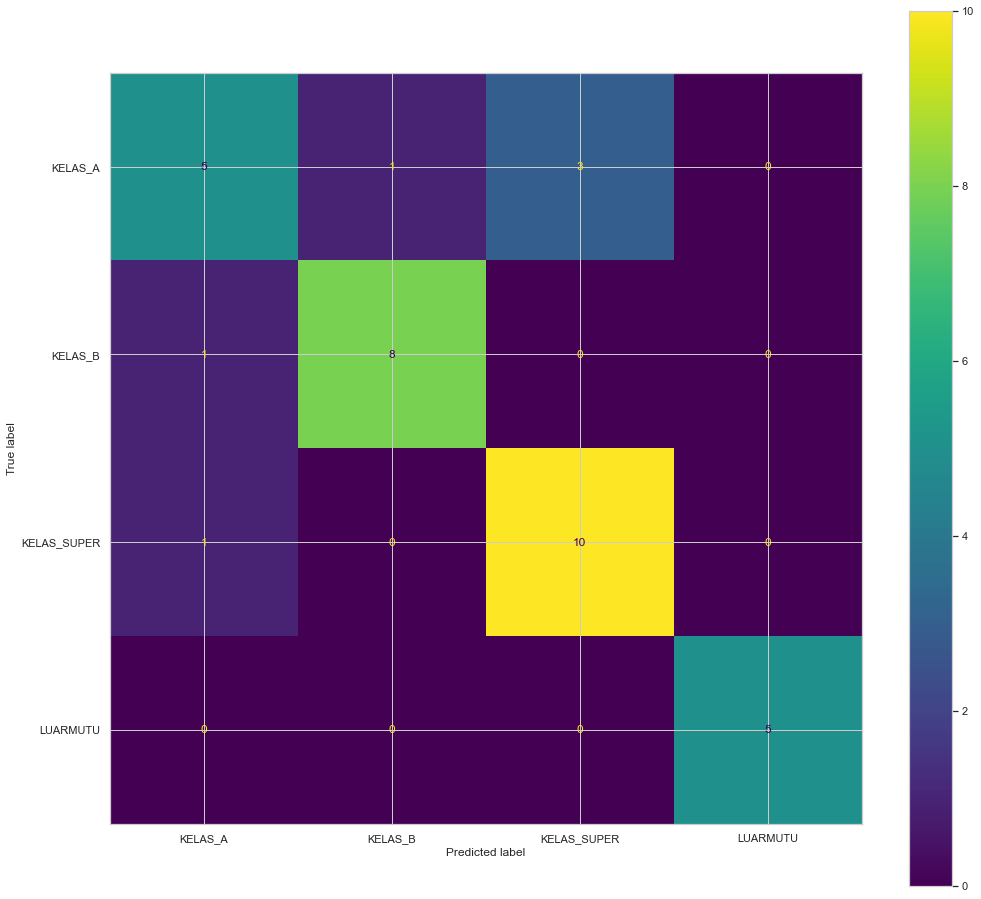

In [21]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test16, y_pred16, ax=ax, display_labels=target_names)
plt.show()

In [22]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test16, y_pred16, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.71      0.56      0.63         9
     KELAS_B       0.89      0.89      0.89         9
 KELAS_SUPER       0.77      0.91      0.83        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.82        34
   macro avg       0.84      0.84      0.84        34
weighted avg       0.82      0.82      0.82        34



# ------------------------------------------------------------------------------------------------

# model x dengan dropout 0.5

# Training

In [14]:
xe = tf.keras.layers.Flatten()(last_output)
xe = tf.keras.layers.Dropout(0.5)(xe)
xe = tf.keras.layers.Dense(4, activation='softmax')(xe)
model17 = tf.keras.Model(inceptionv3.input, xe)
model17.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
model17.compile(optimizer=Adam(lr=0.00005), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history17 = model17.fit(datagen.flow(x_train17, y_train17),
            validation_data=(x_val17, y_val17),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 11s 1s/step - loss: 1.8375 - accuracy: 0.3036 - val_loss: 1.3370 - val_accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 2s 344ms/step - loss: 1.4655 - accuracy: 0.3929 - val_loss: 1.0954 - val_accuracy: 0.3500
Epoch 3/200
4/4 [==============================] - 1s 338ms/step - loss: 1.0749 - accuracy: 0.5536 - val_loss: 0.9854 - val_accuracy: 0.3500
Epoch 4/200
4/4 [==============================] - 2s 433ms/step - loss: 0.9143 - accuracy: 0.6161 - val_loss: 0.8043 - val_accuracy: 0.6500
Epoch 5/200
4/4 [==============================] - 1s 328ms/step - loss: 0.9603 - accuracy: 0.5893 - val_loss: 0.7641 - val_accuracy: 0.7000
Epoch 6/200
4/4 [==============================] - 1s 334ms/step - loss: 0.6949 - accuracy: 0.7411 - val_loss: 0.9260 - val_accuracy: 0.5500
Epoch 7/200
4/4 [==============================] - 2s 441ms/step - loss: 0.7413 - accuracy: 0.6964 - val_loss: 0.9287 - val_accuracy: 0.4500
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 365ms/step - loss: 0.2365 - accuracy: 0.9018 - val_loss: 0.4489 - val_accuracy: 0.8000
Epoch 60/200
4/4 [==============================] - 2s 376ms/step - loss: 0.1794 - accuracy: 0.9464 - val_loss: 0.4619 - val_accuracy: 0.8000
Epoch 61/200
4/4 [==============================] - 2s 361ms/step - loss: 0.3762 - accuracy: 0.8304 - val_loss: 0.5095 - val_accuracy: 0.8000
Epoch 62/200
4/4 [==============================] - 2s 372ms/step - loss: 0.2750 - accuracy: 0.8571 - val_loss: 0.6077 - val_accuracy: 0.7000
Epoch 63/200
4/4 [==============================] - 2s 366ms/step - loss: 0.1863 - accuracy: 0.9196 - val_loss: 0.5535 - val_accuracy: 0.7000
Epoch 64/200
4/4 [==============================] - 2s 368ms/step - loss: 0.2255 - accuracy: 0.9018 - val_loss: 0.4822 - val_accuracy: 0.7500
Epoch 65/200
4/4 [==============================] - 2s 370ms/step - loss: 0.2501 - accuracy: 0.8929 - val_loss: 0.4732 - val_accuracy: 0.7500
Epoch 

4/4 [==============================] - 2s 384ms/step - loss: 0.0932 - accuracy: 0.9643 - val_loss: 0.3618 - val_accuracy: 0.8500
Epoch 174/200
4/4 [==============================] - 2s 469ms/step - loss: 0.0958 - accuracy: 0.9732 - val_loss: 0.3558 - val_accuracy: 0.8500
Epoch 175/200
4/4 [==============================] - 2s 388ms/step - loss: 0.0953 - accuracy: 0.9643 - val_loss: 0.4063 - val_accuracy: 0.9000
Epoch 176/200
4/4 [==============================] - 2s 371ms/step - loss: 0.1139 - accuracy: 0.9464 - val_loss: 0.4758 - val_accuracy: 0.9000
Epoch 177/200
4/4 [==============================] - 2s 471ms/step - loss: 0.1758 - accuracy: 0.9196 - val_loss: 0.4154 - val_accuracy: 0.8500
Epoch 178/200
4/4 [==============================] - 2s 377ms/step - loss: 0.1279 - accuracy: 0.9375 - val_loss: 0.4202 - val_accuracy: 0.8500
Epoch 179/200
4/4 [==============================] - 2s 383ms/step - loss: 0.0758 - accuracy: 0.9732 - val_loss: 0.4494 - val_accuracy: 0.8000
Epoch 180/200

# evaluasi test dan visualisasi

In [17]:
history17.history

{'loss': [1.837528944015503,
  1.4654732942581177,
  1.0749480724334717,
  0.9142597913742065,
  0.9603334069252014,
  0.6948977112770081,
  0.7413333654403687,
  0.6364142298698425,
  0.5286334753036499,
  0.5072641968727112,
  0.48266130685806274,
  0.4855138957500458,
  0.6530684232711792,
  0.45864206552505493,
  0.5839880704879761,
  0.4440082609653473,
  0.4206841289997101,
  0.444234699010849,
  0.3974163830280304,
  0.42229726910591125,
  0.44142717123031616,
  0.45070880651474,
  0.356891393661499,
  0.3534829616546631,
  0.44888344407081604,
  0.39371341466903687,
  0.4310719072818756,
  0.30698326230049133,
  0.3482789695262909,
  0.41044917702674866,
  0.3403388559818268,
  0.2694709002971649,
  0.32230356335639954,
  0.3236273229122162,
  0.3474855422973633,
  0.4140661060810089,
  0.3428364396095276,
  0.4004755914211273,
  0.24429690837860107,
  0.31409257650375366,
  0.27468448877334595,
  0.31765010952949524,
  0.32077550888061523,
  0.2554275691509247,
  0.26499810814

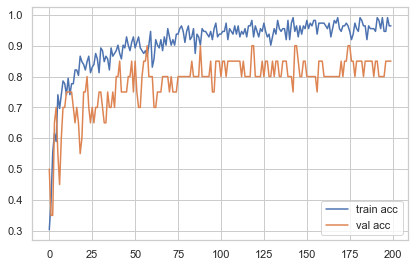

average acc = 0.909464286416769
average val acc = 0.7852500087022781
max acc = 0.9910714030265808
max val acc = 0.8999999761581421


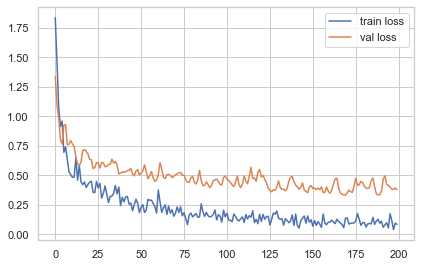

average loss = 0.22669925883412362
average val loss = 0.4918678818643093
max loss = 1.837528944015503
max val loss = 1.3369520902633667


In [18]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history17.history['accuracy'], label='train acc')
plt.plot(history17.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta17 = np.mean(history17.history['accuracy'])
print('average acc = {}'.format(ta17))
va17 = np.mean(history17.history['val_accuracy'])
print('average val acc = {}'.format(va17))
ta17a = np.max(history17.history['accuracy'])
print('max acc = {}'.format(ta17a))
va17a = np.max(history17.history['val_accuracy'])
print('max val acc = {}'.format(va17a))

# loss
plt.plot(history17.history['loss'], label='train loss')
plt.plot(history17.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl17 = np.mean(history17.history['loss'])
print('average loss = {}'.format(tl17))
vl17 = np.mean(history17.history['val_loss'])
print('average val loss = {}'.format(vl17))
tl17a = np.max(history17.history['loss'])
print('max loss = {}'.format(tl17a))
vl17a = np.max(history17.history['val_loss'])
print('max val loss = {}'.format(vl17a))

In [19]:
score17 = model17.evaluate(x_val17, y_val17,  verbose=0)
print('Test loss:', score17[0])
print('Test accuracy:', score17[1])

Test loss: 0.3762925863265991
Test accuracy: 0.8500000238418579


In [20]:
Y_pred17 = model17.predict_generator(x_test17)
y_pred17 = np.argmax(Y_pred17, axis=1)
y_test17 = np.argmax(y_test17, axis=1)
cm17 = confusion_matrix(y_test17, y_pred17)
print(cm17)

[[ 8  0  1  0]
 [ 1  8  0  0]
 [ 1  0 10  0]
 [ 0  0  0  5]]


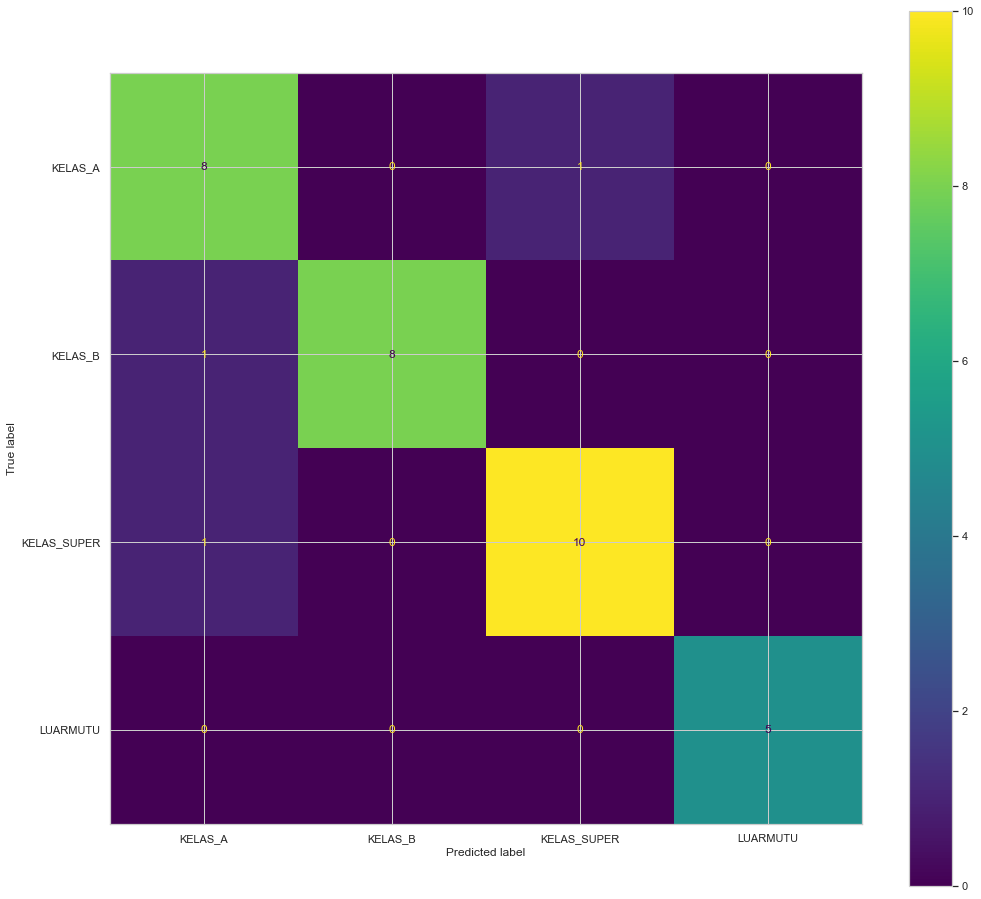

In [21]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test17, y_pred17, ax=ax, display_labels=target_names)
plt.show()

In [22]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test17, y_pred17, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.80      0.89      0.84         9
     KELAS_B       1.00      0.89      0.94         9
 KELAS_SUPER       0.91      0.91      0.91        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.91        34
   macro avg       0.93      0.92      0.92        34
weighted avg       0.92      0.91      0.91        34



# ---------------------------------------------------------

# model x dengan dropout 0.75

# training

In [14]:
xf = tf.keras.layers.Flatten()(last_output)
xf = tf.keras.layers.Dropout(0.75)(xf)
xf = tf.keras.layers.Dense(4, activation='softmax')(xf)
model18 = tf.keras.Model(inceptionv3.input, xf)
model18.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
model18.compile(optimizer=Adam(lr=0.00005), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history18 = model18.fit(datagen.flow(x_train18, y_train18),
            validation_data=(x_val18, y_val18),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 11s 1s/step - loss: 2.4676 - accuracy: 0.2500 - val_loss: 1.3468 - val_accuracy: 0.4500
Epoch 2/200
4/4 [==============================] - 2s 340ms/step - loss: 2.1251 - accuracy: 0.3304 - val_loss: 0.9057 - val_accuracy: 0.6000
Epoch 3/200
4/4 [==============================] - 2s 438ms/step - loss: 1.5892 - accuracy: 0.4196 - val_loss: 0.6853 - val_accuracy: 0.8500
Epoch 4/200
4/4 [==============================] - 2s 426ms/step - loss: 1.3105 - accuracy: 0.5357 - val_loss: 0.6412 - val_accuracy: 0.8000
Epoch 5/200
4/4 [==============================] - 2s 355ms/step - loss: 1.2576 - accuracy: 0.5357 - val_loss: 0.6743 - val_accuracy: 0.7500
Epoch 6/200
4/4 [==============================] - 2s 348ms/step - loss: 1.3351 - accuracy: 0.4911 - val_loss: 0.5935 - val_accuracy: 0.7500
Epoch 7/200
4/4 [==============================] - 2s 432ms/step - loss: 0.9153 - accuracy: 0.7143 - val_loss: 0.4994 - val_accuracy: 0.8000
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 381ms/step - loss: 0.3590 - accuracy: 0.8571 - val_loss: 0.3021 - val_accuracy: 0.8500
Epoch 60/200
4/4 [==============================] - 2s 452ms/step - loss: 0.4793 - accuracy: 0.7946 - val_loss: 0.3076 - val_accuracy: 0.8000
Epoch 61/200
4/4 [==============================] - 2s 386ms/step - loss: 0.4705 - accuracy: 0.8304 - val_loss: 0.3095 - val_accuracy: 0.8000
Epoch 62/200
4/4 [==============================] - 2s 375ms/step - loss: 0.3545 - accuracy: 0.8839 - val_loss: 0.2989 - val_accuracy: 0.8000
Epoch 63/200
4/4 [==============================] - 2s 453ms/step - loss: 0.5389 - accuracy: 0.8393 - val_loss: 0.2912 - val_accuracy: 0.8500
Epoch 64/200
4/4 [==============================] - 2s 373ms/step - loss: 0.5116 - accuracy: 0.8214 - val_loss: 0.2982 - val_accuracy: 0.8500
Epoch 65/200
4/4 [==============================] - 2s 377ms/step - loss: 0.5539 - accuracy: 0.8125 - val_loss: 0.2927 - val_accuracy: 0.8000
Epoch 

4/4 [==============================] - 2s 364ms/step - loss: 0.2137 - accuracy: 0.9107 - val_loss: 0.3672 - val_accuracy: 0.8500
Epoch 117/200
4/4 [==============================] - 2s 461ms/step - loss: 0.3033 - accuracy: 0.8750 - val_loss: 0.3342 - val_accuracy: 0.8000
Epoch 118/200
4/4 [==============================] - 2s 383ms/step - loss: 0.3458 - accuracy: 0.8839 - val_loss: 0.3019 - val_accuracy: 0.8000
Epoch 119/200
4/4 [==============================] - 2s 370ms/step - loss: 0.3261 - accuracy: 0.8750 - val_loss: 0.3267 - val_accuracy: 0.9000
Epoch 120/200
4/4 [==============================] - 2s 392ms/step - loss: 0.2336 - accuracy: 0.8929 - val_loss: 0.3559 - val_accuracy: 0.9000
Epoch 121/200
4/4 [==============================] - 2s 370ms/step - loss: 0.2548 - accuracy: 0.8929 - val_loss: 0.3431 - val_accuracy: 0.9000
Epoch 122/200
4/4 [==============================] - 2s 374ms/step - loss: 0.3157 - accuracy: 0.8839 - val_loss: 0.3116 - val_accuracy: 0.9000
Epoch 123/200

4/4 [==============================] - 2s 474ms/step - loss: 0.2194 - accuracy: 0.9464 - val_loss: 0.3376 - val_accuracy: 0.8500
Epoch 174/200
4/4 [==============================] - 2s 481ms/step - loss: 0.1819 - accuracy: 0.9286 - val_loss: 0.3819 - val_accuracy: 0.8500
Epoch 175/200
4/4 [==============================] - 2s 358ms/step - loss: 0.1545 - accuracy: 0.9464 - val_loss: 0.3600 - val_accuracy: 0.8500
Epoch 176/200
4/4 [==============================] - 2s 384ms/step - loss: 0.2401 - accuracy: 0.9018 - val_loss: 0.3227 - val_accuracy: 0.8000
Epoch 177/200
4/4 [==============================] - 2s 388ms/step - loss: 0.2326 - accuracy: 0.9375 - val_loss: 0.3116 - val_accuracy: 0.8000
Epoch 178/200
4/4 [==============================] - 2s 373ms/step - loss: 0.2084 - accuracy: 0.9196 - val_loss: 0.2976 - val_accuracy: 0.8500
Epoch 179/200
4/4 [==============================] - 2s 370ms/step - loss: 0.1929 - accuracy: 0.9196 - val_loss: 0.3321 - val_accuracy: 0.8500
Epoch 180/200

# evaluasi testing dan visualisasi

In [17]:
history18.history

{'loss': [2.4676015377044678,
  2.125122308731079,
  1.5891687870025635,
  1.310526967048645,
  1.2576255798339844,
  1.335050344467163,
  0.9152864813804626,
  0.9284258484840393,
  1.215469479560852,
  0.8953785300254822,
  1.0840256214141846,
  0.9842718839645386,
  1.1699262857437134,
  0.813194751739502,
  0.7026740312576294,
  0.7595475316047668,
  0.8042402267456055,
  0.6500886082649231,
  0.6826089024543762,
  0.6531973481178284,
  0.767600953578949,
  0.5867863893508911,
  0.7155768275260925,
  0.7161206007003784,
  0.5599676370620728,
  0.8453816175460815,
  0.6641151309013367,
  0.62899249792099,
  0.5296110510826111,
  0.6761614680290222,
  0.4792464077472687,
  0.4643363952636719,
  0.5011420845985413,
  0.3999997079372406,
  0.4748419225215912,
  0.4810592532157898,
  0.6000337600708008,
  0.389842689037323,
  0.6113051772117615,
  0.4723599851131439,
  0.5370696783065796,
  0.5365601181983948,
  0.3897898495197296,
  0.38932615518569946,
  0.5190949440002441,
  0.664490

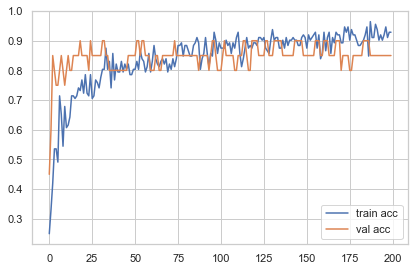

average acc = 0.8405357144773007
average val acc = 0.8472500109672546
max acc = 0.9642857313156128
max val acc = 0.8999999761581421


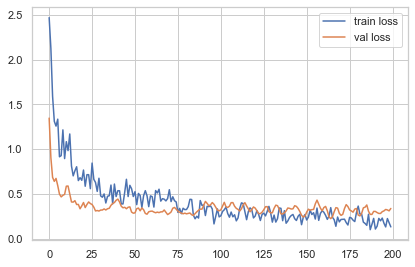

average loss = 0.41628619443625214
average val loss = 0.35113037154078486
max loss = 2.4676015377044678
max val loss = 1.3468101024627686


In [18]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history18.history['accuracy'], label='train acc')
plt.plot(history18.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta18 = np.mean(history18.history['accuracy'])
print('average acc = {}'.format(ta18))
va18 = np.mean(history18.history['val_accuracy'])
print('average val acc = {}'.format(va18))
ta18a = np.max(history18.history['accuracy'])
print('max acc = {}'.format(ta18a))
va18a = np.max(history18.history['val_accuracy'])
print('max val acc = {}'.format(va18a))

# loss
plt.plot(history18.history['loss'], label='train loss')
plt.plot(history18.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl18 = np.mean(history18.history['loss'])
print('average loss = {}'.format(tl18))
vl18 = np.mean(history18.history['val_loss'])
print('average val loss = {}'.format(vl18))
tl18a = np.max(history18.history['loss'])
print('max loss = {}'.format(tl18a))
vl18a = np.max(history18.history['val_loss'])
print('max val loss = {}'.format(vl18a))

In [19]:
score18 = model18.evaluate(x_val18, y_val18,  verbose=0)
print('Test loss:', score18[0])
print('Test accuracy:', score18[1])

Test loss: 0.33924737572669983
Test accuracy: 0.8500000238418579


In [20]:
Y_pred18 = model18.predict_generator(x_test18)
y_pred18 = np.argmax(Y_pred18, axis=1)
y_test18 = np.argmax(y_test18, axis=1)
cm18 = confusion_matrix(y_test18, y_pred18)
print(cm18)

[[ 5  3  1  0]
 [ 1  8  0  0]
 [ 1  0 10  0]
 [ 0  0  0  5]]


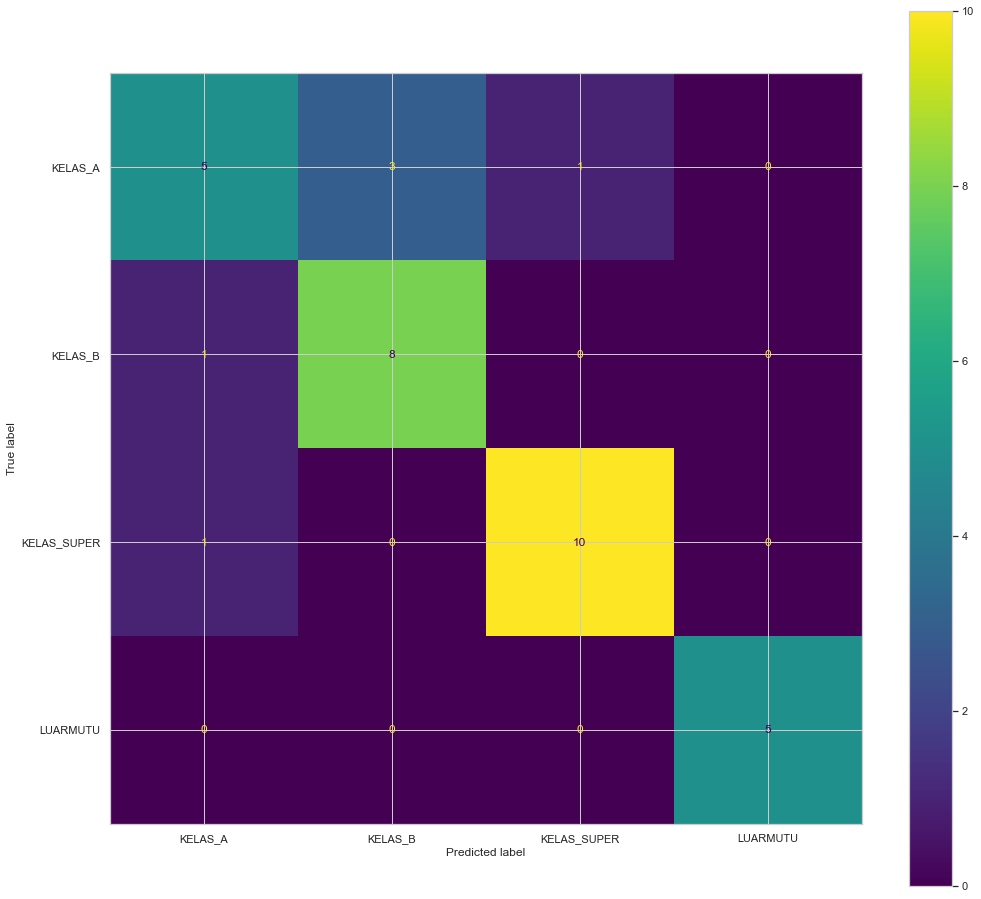

In [21]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test18, y_pred18, ax=ax, display_labels=target_names)
plt.show()

In [22]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test18, y_pred18, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.71      0.56      0.63         9
     KELAS_B       0.73      0.89      0.80         9
 KELAS_SUPER       0.91      0.91      0.91        11
    LUARMUTU       1.00      1.00      1.00         5

    accuracy                           0.82        34
   macro avg       0.84      0.84      0.83        34
weighted avg       0.82      0.82      0.82        34



# Save model

In [ ]:
tf.saved_model.save(model6, "model6-291222")

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("model6-291222")
tflite_model = converter.convert()
open("model6-291222.tflite", "wb").write(tflite_model)